<a href="https://colab.research.google.com/github/vbanai/Time-series-analysis/blob/main/StockExchange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time series analyis - Stock market

In [1]:


import os
os.environ['KAGGLE_USERNAME'] = "viktorbanai" # username from the json file
os.environ['KAGGLE_KEY'] = "9431db56af1a1a63cab88b4e516a2248" # key from the json file
!kaggle datasets download -d camnugent/sandp500 # api copied from kaggle



 98% 19.0M/19.3M [00:01<00:00, 24.5MB/s]
100% 19.3M/19.3M [00:01<00:00, 13.7MB/s]


In [2]:

!mkdir file_destination


In [ ]:
!unzip -u "/content/sandp500.zip" -d "/content/file_destination"

I. Price movement check </br>
Analyzing American Airlines Group's stock price and volume movement (2013-2018)

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import tensorflow as tf
from tensorflow import keras
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as sgt
import matplotlib.ticker as plticker
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller


In [3]:

dataset_AAL=pd.read_csv("/content/file_destination/individual_stocks_5yr/individual_stocks_5yr/AAL_data.csv", index_col=0, parse_dates=True)
#dataset=dataset.dropna()  # dropping nonvalue colomns if there is some in the dataset
dataset_AAL.head()


,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [15]:
#check if we have NA element
dataset_AAL.isna().sum()

open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

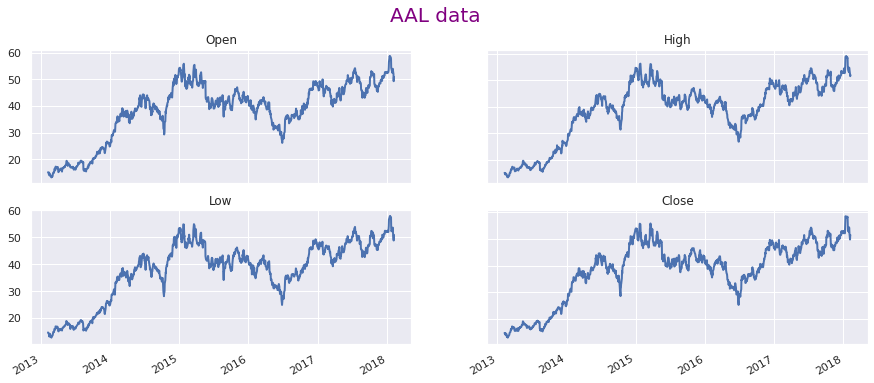

<Figure size 432x288 with 0 Axes>

In [7]:
fig1, ax1=plt.subplots(2,2, figsize=(15,6))

dataset_AAL['open'].plot(ax=ax1[0,0], linewidth=2)
ax1[0, 0].set_title('Open')
ax1[0, 0].set_xlabel

dataset_AAL['high'].plot(ax=ax1[0,1], linewidth=2)
ax1[0, 1].set_title('High')

dataset_AAL['low'].plot(ax=ax1[1,0], linewidth=2)
ax1[1, 0].set_title('Low')

dataset_AAL['close'].plot(ax=ax1[1,1], linewidth=2)
ax1[1, 1].set_title('Close')


for ax in ax1.flat:
    ax.set(xlabel='', ylabel='')
    
for ax in ax1.flat:  # delet the unnecessary x and y labeling
    ax.label_outer()
    
fig1.suptitle('AAL data', fontsize=20, color='purple')

plt.show()

plt.tight_layout()

You can see that AAL’s upward trend throughout most of 2013, more or less 2014 and 2018 was interrupted by smaller declines in price. These dips could be considered pullbacks because the price trend quickly returned to its overall positive momentum. In contrast, 2015 and the first half of 2016, you can see AAL’s stock reversed its broader course into a downward trend.</br>
</br>
So now at the beginig we can state that the curves look like a random walk (the current value depends on the previous one.) plot, and almost all stock price data follows random walk pattern, where there is no point in pouring vast amount of energy to build good predicting models, as it is quite impossible, because of the randomness.

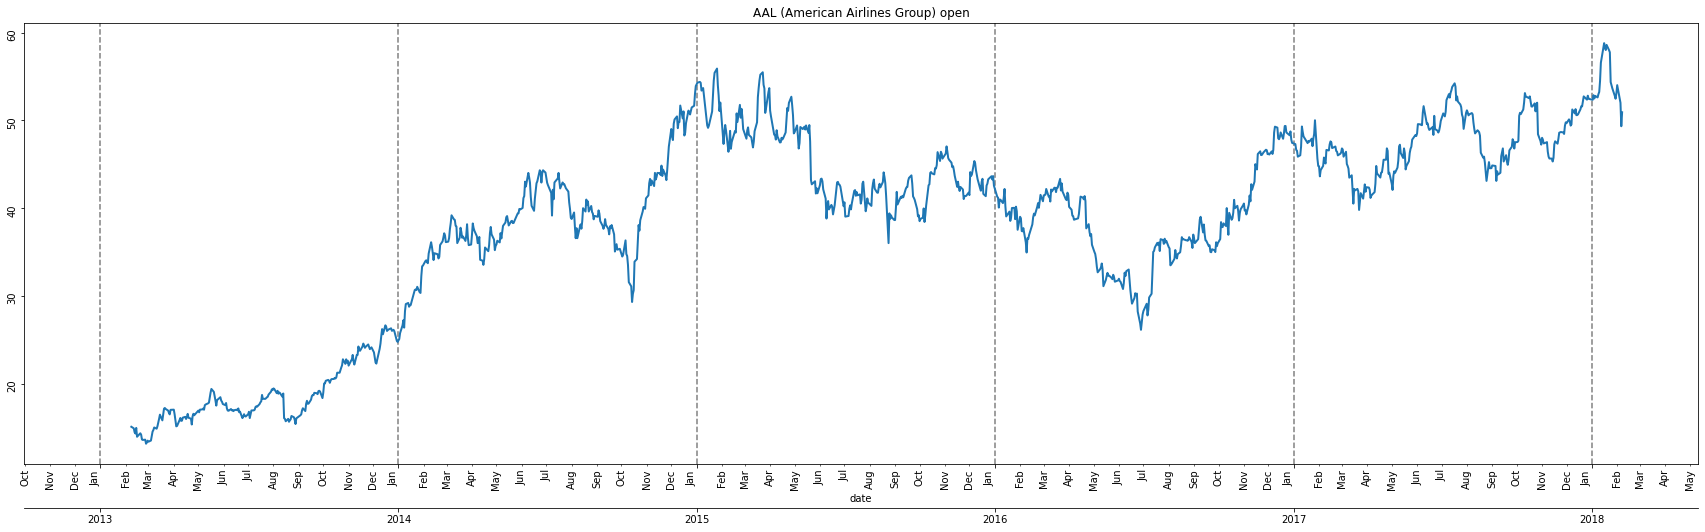

In [16]:
from datetime import datetime
from matplotlib import dates as mdates

d=dataset_AAL.resample('M').mean()
#plt.figure(figsize=(20,9))
#plt.plot(d.index, d.close)
fig, ax=plt.subplots(1, 1, figsize=(30, 9))
for year in range(2013, 2019):
  plt.axvline(datetime(year,1,1),color='k', linestyle="--", alpha=0.5)
dataset_AAL.open.plot(ax=ax, linewidth=2, title="AAL (American Airlines Group) open")

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
# Minor ticks every year.
fmt_year = mdates.YearLocator()

ax.xaxis.set_minor_locator(fmt_month)
# '%b' to get the names of the month
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_locator(fmt_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# fontsize for month labels
ax.tick_params(labelsize=10, which='both', rotation=(90))
# create a second x-axis beneath the first x-axis to show the year in YYYY format
sec_xaxis = ax.secondary_xaxis(-0.1)
sec_xaxis.xaxis.set_major_locator(fmt_year)
sec_xaxis.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


In [17]:

import plotly.express as px

dataset_AAL_plotly=pd.read_csv("/content/file_destination/individual_stocks_5yr/individual_stocks_5yr/AAL_data.csv", parse_dates=True)
fig=px.line(dataset1, x="date", y="volume")
fig.update_layout(title_text='AAL volume',
                  xaxis_rangeslider_visible=True,
                  height=600)
fig.show()

Let's check some basic movement in trading visually and on the basis of correlation figures </br>
</br>
1.) Higher volume and volatility correlation</br>
Now we can't check the volatility within a day, but we can check daily changes in the opening and closing price at the higher volume peaks.

In [ ]:
#return : change between the values for two consecutive periods
dataset_AAL_plotly['open_return']=dataset_AAL_plotly.open.pct_change(1).mul(100)
dataset_AAL_plotly['close_return']=dataset_AAL_plotly.close.pct_change(1).mul(100)
dataset_AAL_plotly['volume_return']=dataset_AAL_plotly.volume.pct_change(1).mul(100)
dataset_AAL_plotly=dataset_AAL_plotly.dropna()
dataset_AAL_plotly

In [28]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=dataset_AAL_plotly['date'], y=dataset_AAL_plotly['close_return'], name="return on close"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=dataset_AAL_plotly['date'], y=dataset_AAL_plotly['volume'], name="volume"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Volume and closing price return (current/prior lag)",
    xaxis_rangeslider_visible=True
)

# Set x-axis title
fig.update_xaxes(title_text="date")

# Set y-axes titles
fig.update_yaxes(title_text="change in close price (%)", secondary_y=False)
fig.update_yaxes(title_text="volume (USD)", secondary_y=True)

fig.show()

We can clearly see on the chart that higher volume peaks has impact on the closing price retrun

2.) Checking stock price and volume movements


In [27]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=dataset_AAL_plotly['date'], y=dataset_AAL_plotly['close_return'], name="return on close"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=dataset_AAL_plotly['date'], y=dataset_AAL_plotly['volume_return'], name="volume_return"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Volume return and closing price return (current/prior lag)",
    xaxis_rangeslider_visible=True
)

# Set x-axis title
fig.update_xaxes(title_text="date")

# Set y-axes titles
fig.update_yaxes(title_text="change in close price (%)", secondary_y=False)
fig.update_yaxes(title_text="change in volume (%)", secondary_y=True)

fig.show()

We can see that the increasing volume shows the conviction of buyers and sellers in either pushing the price up or down. 

If a stock with a high trading volume is rising, it means there is buying pressure, as investor demand pushes the stock to higher and higher prices. On the other hand, if the price of a stock with a high trading volume is falling, it means more investors are selling their shares.
But the correlation figures between volume change and change in close /open  (underneath) are close to zero, so most of the time, outside these peaks we can't detect such pattern, or the situation is that when the stock's traded volume is high, there is a balance of orders (buying, selling), and the volatility remains at low level. 

In [ ]:
dataset_AAL_plotly_shifted=dataset_AAL_plotly.copy(deep=True)
dataset_AAL_plotly_shifted['close_return']=dataset_AAL_plotly_shifted['close_return'].shift(1)
dataset_AAL_plotly_shifted['volume_return']=dataset_AAL_plotly_shifted['volume_return'].shift(1)
dataset_AAL_plotly_shifted=dataset_AAL_plotly_shifted.dropna()


In [44]:
print("Correlation between prior closing price & current opening price: " + str(dataset_AAL_plotly['close'].corr(dataset_AAL_plotly['open'])))
print("Correlation between prior closing return & current opening return: " + str(dataset_AAL_plotly_shifted['close_return'].corr(dataset_AAL_plotly_shifted['open_return'])))
print("Correlation between closing return & volume return: " + str(dataset_AAL_plotly['close_return'].corr(dataset_AAL_plotly['volume_return'])))
print("Correlation between prior volume return & current opening return: " + str(dataset_AAL_plotly_shifted['open_return'].corr(dataset_AAL_plotly_shifted['volume_return'])))

Correlation between prior closing price & current opening price: 0.9976737974657346
Correlation between prior closing return & current opening return: 0.7441167885218173
Correlation between closing return & volume return: -0.1341373749783005
Correlation between prior volume return & current opening return: -0.025154427849669304


Let's plot Fox Corporations stock history

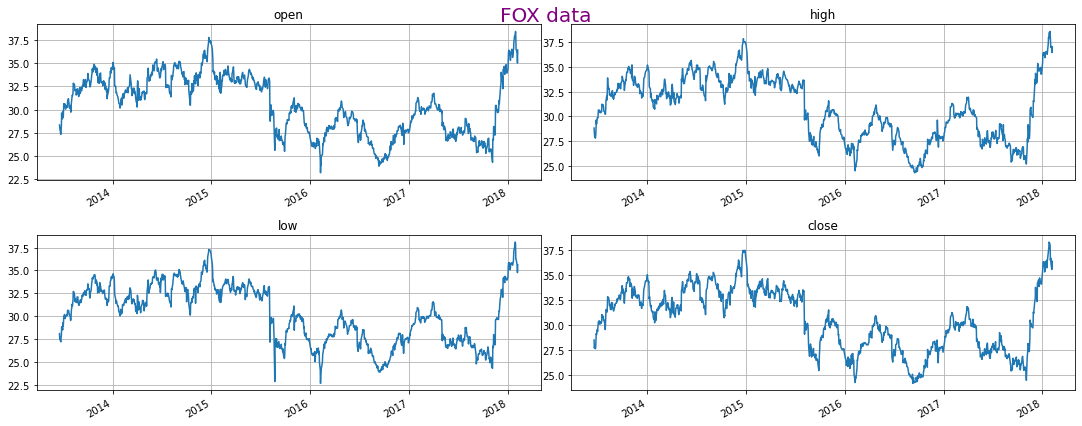

In [ ]:
dataset=pd.read_csv("/content/file_destination/individual_stocks_5yr/individual_stocks_5yr/FOX_data.csv", index_col=0, parse_dates=True)

plt.figure(figsize=(15, 6))
plt.suptitle('FOX data', fontsize=20, color='purple')
t=["open", "high", "low", "close"]
for i in range(4):
    plt.subplot(2, 2, i+1)
    dataset[t[i]].plot()
    plt.ylabel(None)
    plt.xlabel(None)
    plt.title(t[i])
    plt.grid()
    
plt.tight_layout()


Plotting Google and Apple together

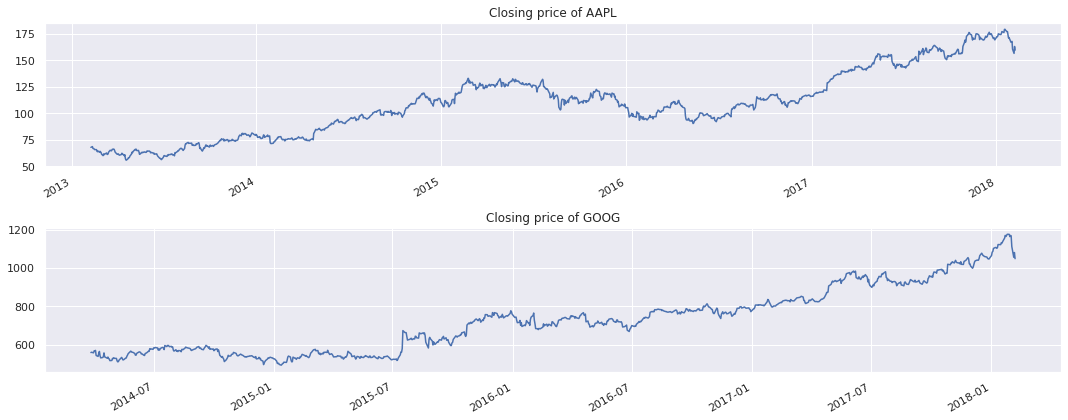

In [109]:
dataset_Apple=pd.read_csv("/content/file_destination/individual_stocks_5yr/individual_stocks_5yr/AAPL_data.csv", index_col=0, parse_dates=True)

dataset_Google=pd.read_csv("/content/file_destination/individual_stocks_5yr/individual_stocks_5yr/GOOG_data.csv", index_col=0, parse_dates=True)

plt.figure(figsize=(15, 6))
#plt.suptitle('AAL data', fontsize=20, color='purple')
#t=["open", "high", "low", "close"]
company=[dataset_Apple, dataset_Google]
for i in range(2):
    plt.subplot(2,1, i+1)
    company[i]['close'].plot()
    plt.ylabel(None)
    plt.xlabel(None)
    plt.title("Closing price of {company}".format(company=company[i]['Name'][0]))
  
    
plt.tight_layout()


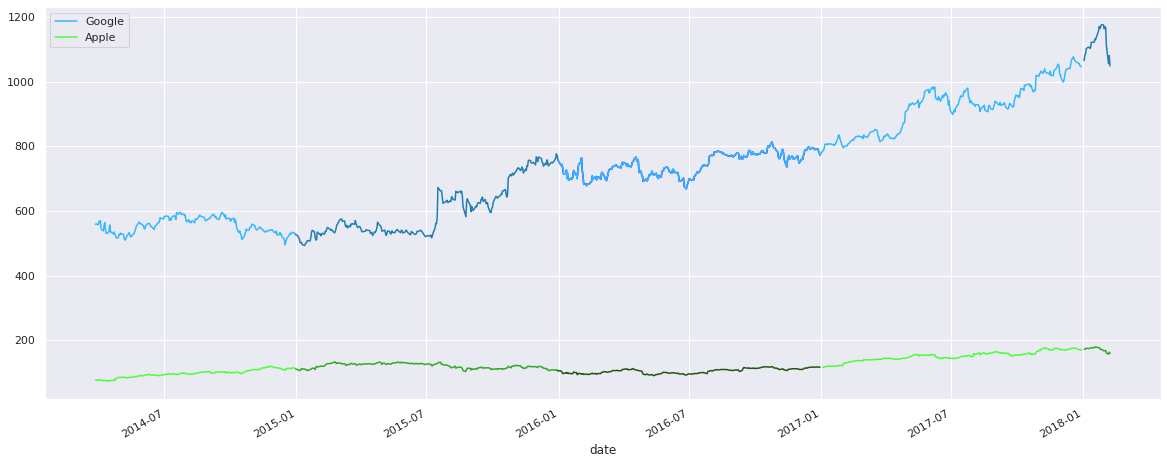

In [14]:
start_date='2014-03-27'
end_date='2018-02-07'
ann1='2014-12-31'
ann2='2015-12-31'
ann3='2016-12-31'
ann4='2017-12-31'
dataset_Google.close[start_date:ann1].plot(figsize=(20,8), color="#33B8FF")
dataset_Apple.close[start_date:ann1].plot(color="#49FF3A")
dataset_Apple.close[ann1:ann2].plot(color="#2FAB25")
dataset_Google.close[ann1:ann2].plot(figsize=(20,8), color="#1E7EB2")
dataset_Apple.close[ann2:ann3].plot(color="#225414")
dataset_Google.close[ann2:ann3].plot(figsize=(20,8), color="#0000FF")
dataset_Google.close[ann2:ann4].plot(figsize=(20,8), color="#33B8FF")
dataset_Apple.close[ann3:ann4].plot(color="#49FF3A")
dataset_Google.close[ann4:end_date].plot(figsize=(20,8), color="#1E7EB2")
dataset_Apple.close[ann4:end_date].plot(color="#2FAB25")
plt.legend(['Google','Apple'])


In 2014 and 2015 the two stocks move in a different fashion while in 2016 and 2017 they follow the same trend, just Google's numbers seem to be roughly 8 times higher and the gap between the two stocks is becoming bigger and bigger. Let's see if the correlation figures underpin what can be detect visually.

In [50]:
print("Correlation between Google & Apple (2014): " + str(dataset_Google.close[start_date:ann1].corr(dataset_Apple.close[start_date:ann1])))
print("Correlation between Google & Apple (2015): " + str(dataset_Google.close[ann1:ann2].corr(dataset_Apple.close[ann1:ann2])))
print("Correlation between Google & Apple (2016): " + str(dataset_Google.close[ann2:ann3].corr(dataset_Apple.close[ann2:ann3])))
print("Correlation between Google & Apple (2017): " + str(dataset_Google.close[ann3:ann4].corr(dataset_Apple.close[ann3:ann4])))
print("Correlation between Google & Apple (2018): " + str(dataset_Google.close[ann4:end_date].corr(dataset_Apple.close[ann4:end_date])))

Correlation between Google & Apple (2014): -0.038508852358111356
Correlation between Google & Apple (2015): -0.4500984752061759
Correlation between Google & Apple (2016): 0.8970343298678687
Correlation between Google & Apple (2017): 0.8957265492866581
Correlation between Google & Apple (2018): 0.32248223126405523


II. Forecasting (dataset Google closing price)

First let's check if we can detect trend and seasonal component, and find unexpected values which out of normal data.

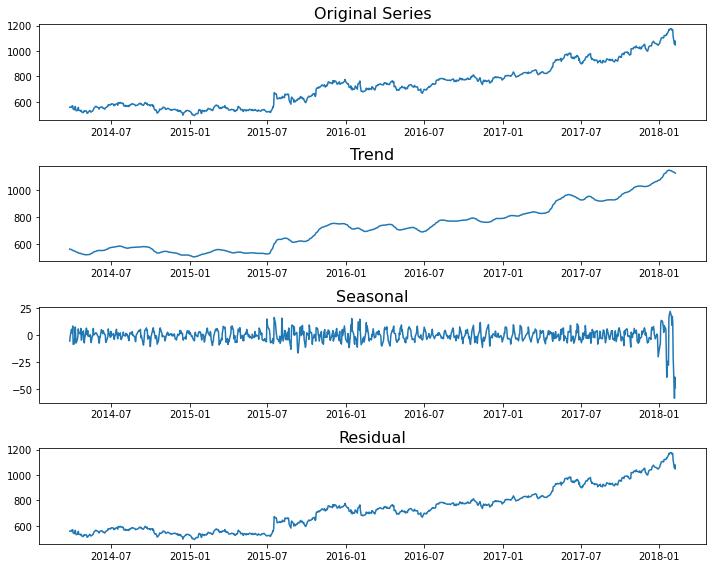

In [20]:
#Peforming seasonal trend decomposition
from statsmodels.tsa.seasonal import STL
stl=STL(dataset_Google['close'], period=12)
result=stl.fit()
seasonal, trend, resid=result.seasonal, result.trend, result.resid

plt.figure(figsize=(10,8))
plt.subplot(4,1,1)
plt.plot(dataset_Google['close'])
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
plt.plot(trend)
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
plt.plot(seasonal)
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
plt.plot(dataset_Google['close'])
plt.title('Residual', fontsize=16)

plt.tight_layout()

We can see that the noise is quite big, and we can't detect any seasonal patterns, but it is OK as stock prices behave almost like random data series

Perform Anomaly Detection (in this case not anomalies will make the good prediction almost impossible, but the randomness)

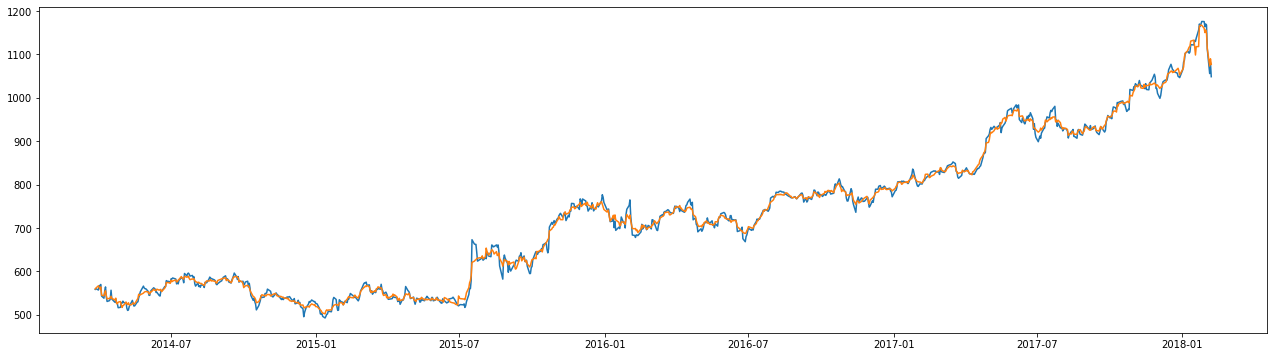

In [23]:
# Let's check how big is the noise, the key areas where the original (blue plot) doesn't match up well with 
#the yellow plot (trend + seasonal part)
# This is the ANOMLIES, where residuals are qutie extreme

estimated=trend + seasonal
plt.figure(figsize=(22,6))
plt.plot(dataset_Google['close'])
plt.plot(estimated)

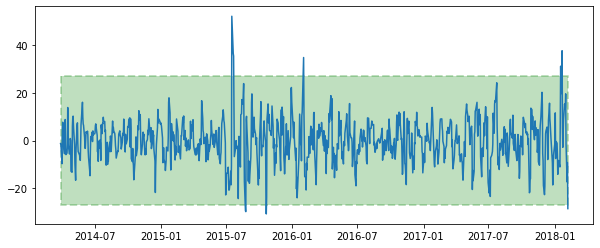

In [28]:
#Anomaly Detection
#Any timepoint which breaches the green bar is classified as anomaly


resid_mean=resid.mean()
resid_sdev=resid.std()

lower=resid_mean -3*resid_sdev
upper=resid_mean+3*resid_sdev

plt.figure(figsize=(10,4))
plt.plot(resid)
plt.fill_between([datetime(2014,3,27), datetime(2018,2,7)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)


In [ ]:
anomalies = dataset_Google.close[(resid < lower) | (resid > upper)]


Text(0.5, 1.0, 'Anomaly detection')

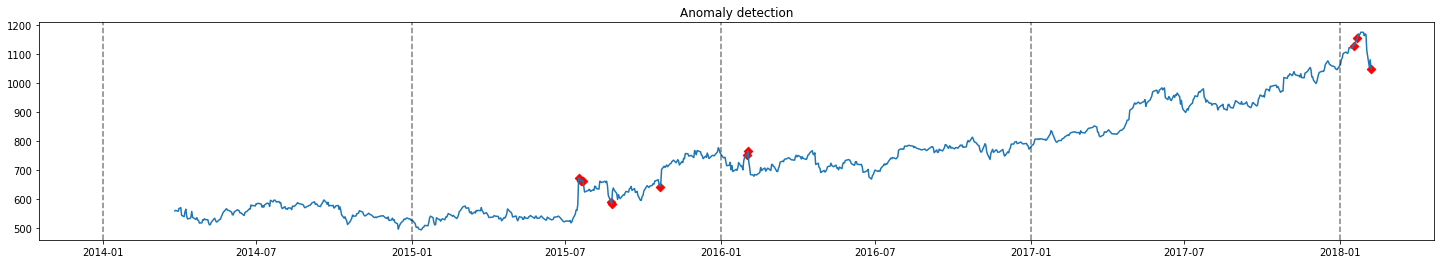

In [42]:

anomalies = dataset_Google.close[(resid < lower) | (resid > upper)]

plt.figure(figsize=(25,4))
plt.plot(dataset_Google['close'])
for year in range(2014,2019):
    plt.axvline(datetime(year,1,1), color='k', linestyle='--', alpha=0.5)
    
plt.scatter(anomalies.index, anomalies, color='r', marker='D')
plt.title("Anomaly detection")




Checking the noise with additive and multiplicative decomposition

<ipython-input-88-07293f33095c>:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  multiplicative_decomposition = seasonal_decompose(dataset_Google['close'], model='multiplicative', freq=30)
<ipython-input-88-07293f33095c>:9: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  additive_decomposition = seasonal_decompose(dataset_Google['close'], model='additive', freq=30)


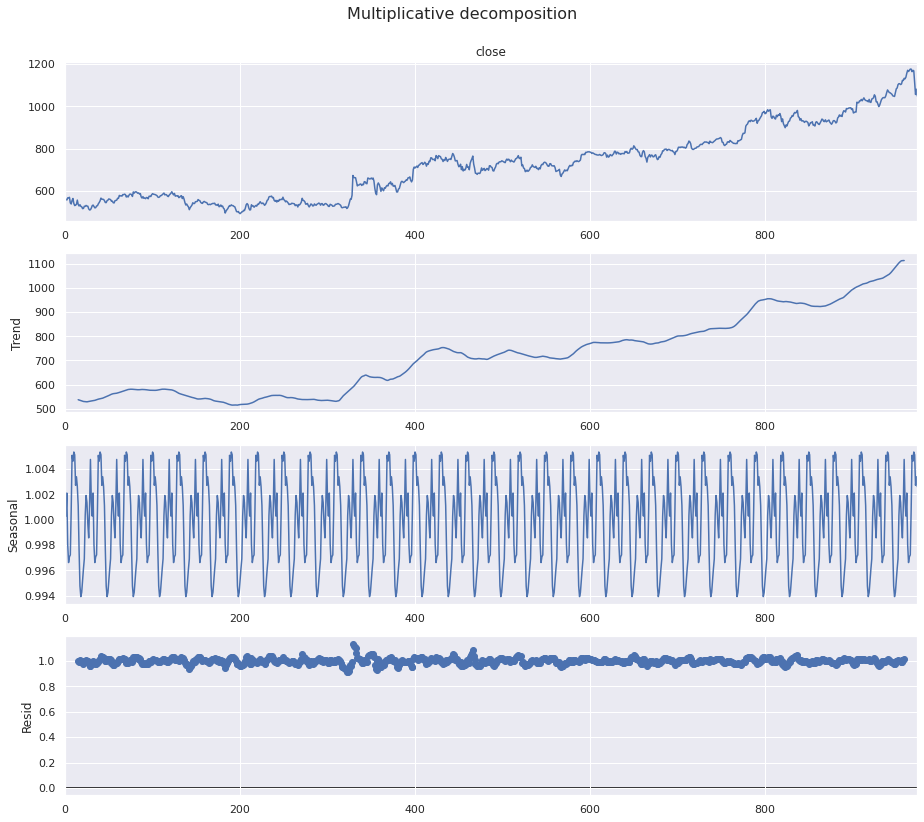

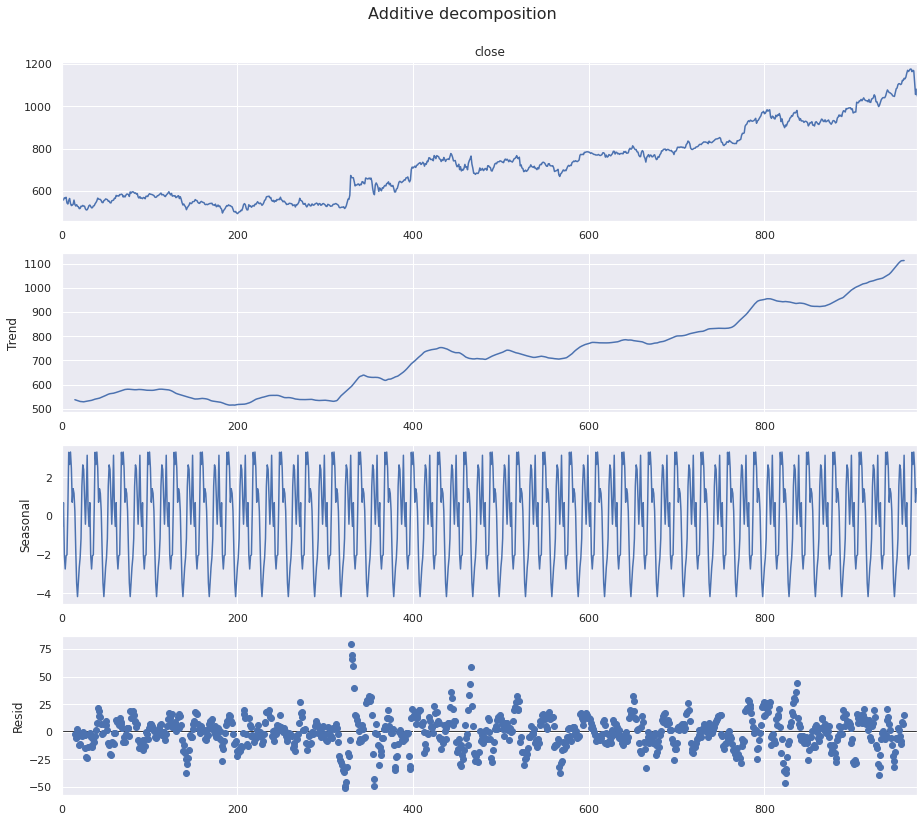

In [88]:

# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(dataset_Google['close'], model='multiplicative', freq=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(dataset_Google['close'], model='additive', freq=30)

# Plot
plt.rcParams.update({'figure.figsize': (13,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

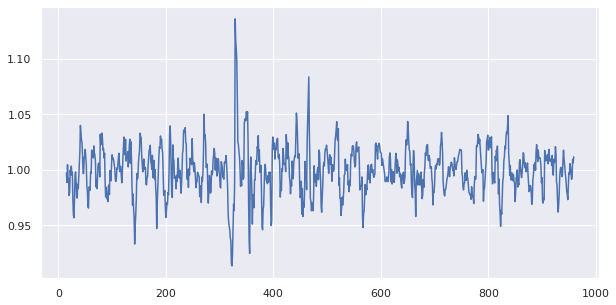

In [93]:
#Let's see the noise on a line digaramm as well
plt.rcParams.update({'figure.figsize': (10,5)})
plt.plot(multiplicative_decomposition.resid)

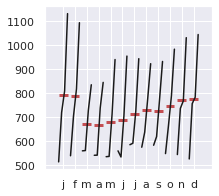

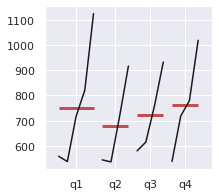

In [110]:
#Check the seasonal component

plt.rcParams.update({'figure.figsize': (3,3)})
month_plot(dataset_Google['close'].resample(rule="MS").mean());
quarter_plot(dataset_Google['close'].resample(rule="Q").mean());
#black line shows that the volatility  (MAGNITUDE OF RESIDUALS' ERRORS) is very high

We can conclude on the basis of additive and multiplicative decompostion that the noise will make our prediction really hard in this dataset, and real seasonality patterns can't be detected

2.) Simplier forcasting methods</br>

A) NAIVE forecast </br>We assume that the prior value and the current value are almost the same) 

In [39]:

dataset_Google=pd.read_csv("/content/file_destination/individual_stocks_5yr/individual_stocks_5yr/GOOG_data.csv")

In [40]:
Google_dataset_conversiontolist=dataset_Google.to_numpy('str').tolist()

In [12]:
len(Google_dataset_conversiontolist)

975

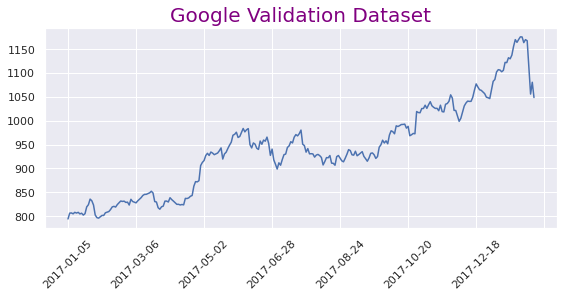

In [41]:

close=[]
time=[]

for i in range(len(Google_dataset_conversiontolist)):
  time.append(Google_dataset_conversiontolist[i][0])
  close.append(float(Google_dataset_conversiontolist[i][4]))

split_time=700
time_train=time[:700]
x_train=close[:700]
time_valid=time[700:]
x_valid=close[700:]


fig, ax = plt.subplots(figsize=(8,4))
ax.plot(time_valid,x_valid)
loc = plticker.MultipleLocator(base=40.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_tick_params(rotation=45)
plt.tight_layout()
plt.title('Google Validation Dataset', fontsize=20, color='purple')

plt.show()


In [25]:
naive_forecast = close[split_time-1:-1]
print("mean_squared_error: ",keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print("mean_absolute_error: ", keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

mean_squared_error:  112.52505
mean_absolute_error:  7.1559253


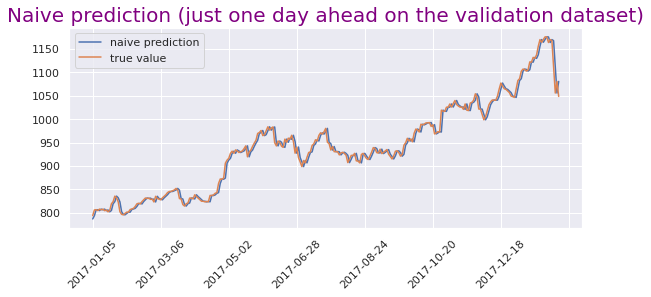

In [26]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(time_valid, naive_forecast)
ax.plot(time_valid, x_valid)
loc = plticker.MultipleLocator(base=40.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_tick_params(rotation=45)
plt.tight_layout()
plt.title('Naive prediction (just one day ahead on the validation dataset)', fontsize=20, color='purple')
plt.legend(['naive prediction', 'true value'])

plt.show()

In [52]:
#prediction 20 days ahead

rolling_prediction=[]
prediction_range=19
naive_forecast2 = close[split_time-1]
rolling_prediction.append(naive_forecast2)
for i in range(prediction_range):
  naive_forecast_i = rolling_prediction[i]
  rolling_prediction.append(naive_forecast_i)
 

print("Naive20_mean_squared_error: ",keras.metrics.mean_squared_error(x_valid[:20], rolling_prediction).numpy())
print("Naive20_mean_absolute_error: ", keras.metrics.mean_absolute_error(x_valid[:20], rolling_prediction).numpy())

Naive20_mean_squared_error:  617.57825
Naive20_mean_absolute_error:  22.063976


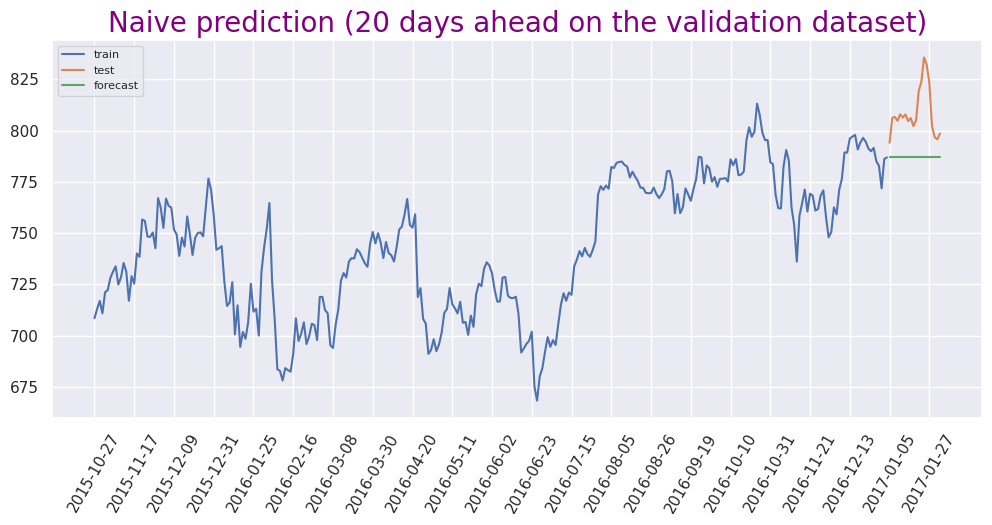

In [53]:
prediction_dataset=pd.Series(rolling_prediction, index=time_valid[:20])
train_dataset=pd.Series(x_train, index=time_train)
validation_dataset=pd.Series(x_valid[:20], index=time_valid[:20])

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_dataset[-300:], label='train')
plt.plot(validation_dataset, label='test')
plt.plot(prediction_dataset, label='forecast')
plt.title('Naive prediction (20 days ahead on the validation dataset)', fontsize=20, color='purple')
plt.xticks(np.arange(0, len(train_dataset[-300:])+len(validation_dataset)+1, 15))
plt.xticks(rotation=60)
plt.legend(loc='upper left', fontsize=8)

B) Moving average (it is used most of the time to check the direction of the trend)

- Predicting one day ahead (using window 20,30,50 being useful for forex markets, but here it will be also appropriate)

mean_squared_error for window 5:  301.2696
mean_absolute_error for window 5:  12.817238
mean_squared_error for window 30:  1352.7479
mean_absolute_error for window 30:  28.728567
mean_squared_error for window 50:  2443.3367
mean_absolute_error for window 50:  39.500957



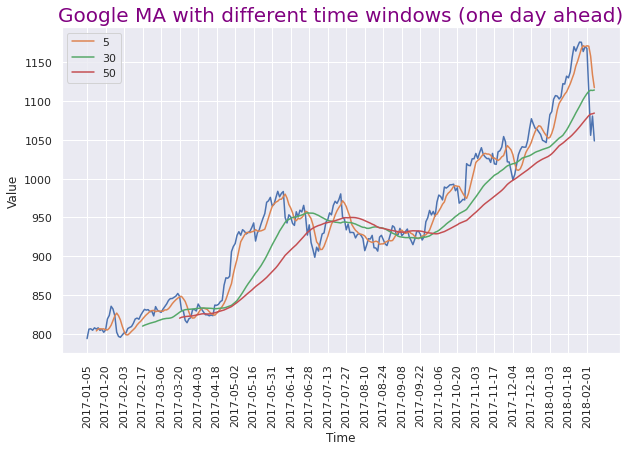

In [45]:


def moving_average(x_valid, window):
  moving_average_data=[]
  for i in range(0, len(x_valid)-window):
    moving_average_data.append(sum(x_valid[i:i+window])/window)
  return moving_average_data

a=moving_average(x_valid, 30)

time_valid_minusforMA=0

def ploting(window1, window2, window3):
  moving_average_data1=[]
  for i in range(0, len(x_valid)-window1):
    moving_average_data1.append(sum(x_valid[i:i+window1])/window1)
  moving_average_data2=[]
  for i in range(0, len(x_valid)-window2):
    moving_average_data2.append(sum(x_valid[i:i+window2])/window2)
  moving_average_data3=[]
  for i in range(0, len(x_valid)-window3):
    moving_average_data3.append(sum(x_valid[i:i+window3])/window3)

  
  
  plt.figure(figsize=(10, 6))
  plt.plot(time_valid, x_valid)
  plt.plot(time_valid[window1:], moving_average_data1, label=window1)
  plt.plot(time_valid[window2:], moving_average_data2, label=window2)
  plt.plot(time_valid[window3:], moving_average_data3, label=window3)
  plt.title('Google MA with different time windows (one day ahead)', fontsize=20, color='purple')
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.legend(loc="upper left")
  plt.xticks(np.arange(0, len(time_valid)+1, 10))
  plt.xticks(rotation=90)
 
  print(f"mean_squared_error for window {window1}: ", keras.metrics.mean_squared_error(x_valid[window1:], moving_average_data1).numpy())
  print(f"mean_absolute_error for window {window1}: ", keras.metrics.mean_absolute_error(x_valid[window1:], moving_average_data1).numpy())

  print(f"mean_squared_error for window {window2}: ", keras.metrics.mean_squared_error(x_valid[window2:], moving_average_data2).numpy())
  print(f"mean_absolute_error for window {window2}: ", keras.metrics.mean_absolute_error(x_valid[window2:], moving_average_data2).numpy())

  print(f"mean_squared_error for window {window3}: ", keras.metrics.mean_squared_error(x_valid[window3:], moving_average_data3).numpy())
  print(f"mean_absolute_error for window {window3}: ", keras.metrics.mean_absolute_error(x_valid[window3:], moving_average_data3).numpy())
  print("")


ploting(5,30,50)

- Prediction 20 days ahead with window 5

mean_squared_error for window 5:  807.7713
mean_absolute_error for window 5:  26.033611


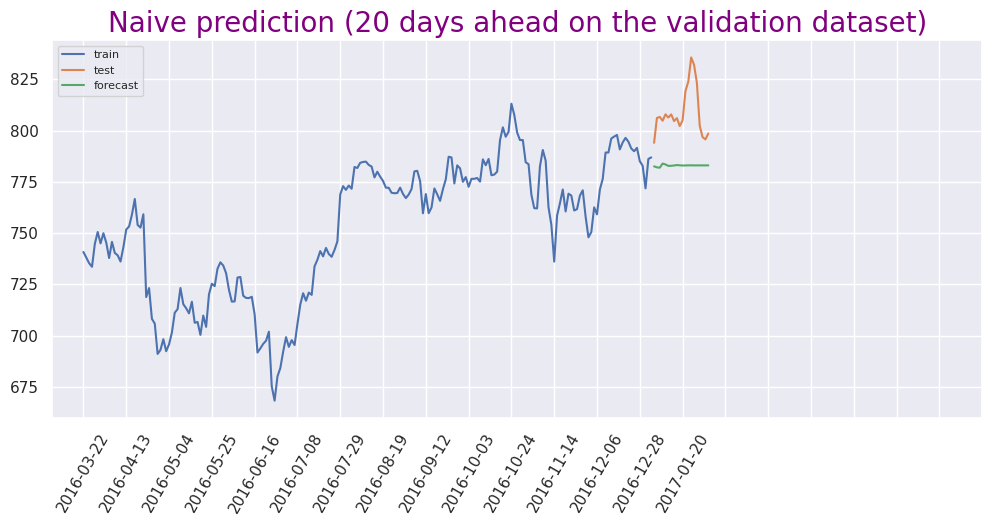

In [54]:
prediction_period=20
window=5
moving_average_data=[]
shifting_window_data=x_train[-window:]

for i in range(prediction_period):
  prediction=sum(shifting_window_data)/window
  moving_average_data.append(prediction)
  shifting_window_data.append(prediction)
  del shifting_window_data[0]

prediction_dataset=pd.Series(moving_average_data, index=time_valid[:20])
train_dataset=pd.Series(x_train, index=time_train)
validation_dataset=pd.Series(x_valid[:20], index=time_valid[:20])

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_dataset[-200:], label='train')
plt.plot(validation_dataset, label='test')
plt.plot(prediction_dataset, label='forecast')
plt.title('Naive prediction (20 days ahead on the validation dataset)', fontsize=20, color='purple')
plt.xticks(np.arange(0, len(train_dataset[-300:])+len(validation_dataset)+1, 15))
plt.xticks(rotation=60)
plt.legend(loc='upper left', fontsize=8)

print(f"mean_squared_error for window {window}: ", keras.metrics.mean_squared_error(x_valid[:prediction_period], moving_average_data).numpy())
print(f"mean_absolute_error for window {window}: ", keras.metrics.mean_absolute_error(x_valid[:prediction_period], moving_average_data).numpy())




- Time Differencing to eliminate trend and after applying moving average to smooth out the noise and at the 3. step</br> adding back the trend with the prior value to the current one</br>
This method can be used only in one day prediction, as we don't have further data to add back

mean_squared_error for window (diff dataset) 5:  24.656781916190933
mean_absolute_error for window (diff dataset) 5:  3.804721500355111
mean_squared_error for window (diff dataset) 30:  3.8207326659735585
mean_absolute_error for window (diff dataset) 30:  1.495561482599434
mean_squared_error for window (diff dataset) 50:  2.337631977059576
mean_absolute_error for window (diff dataset) 50:  1.2911036196732966



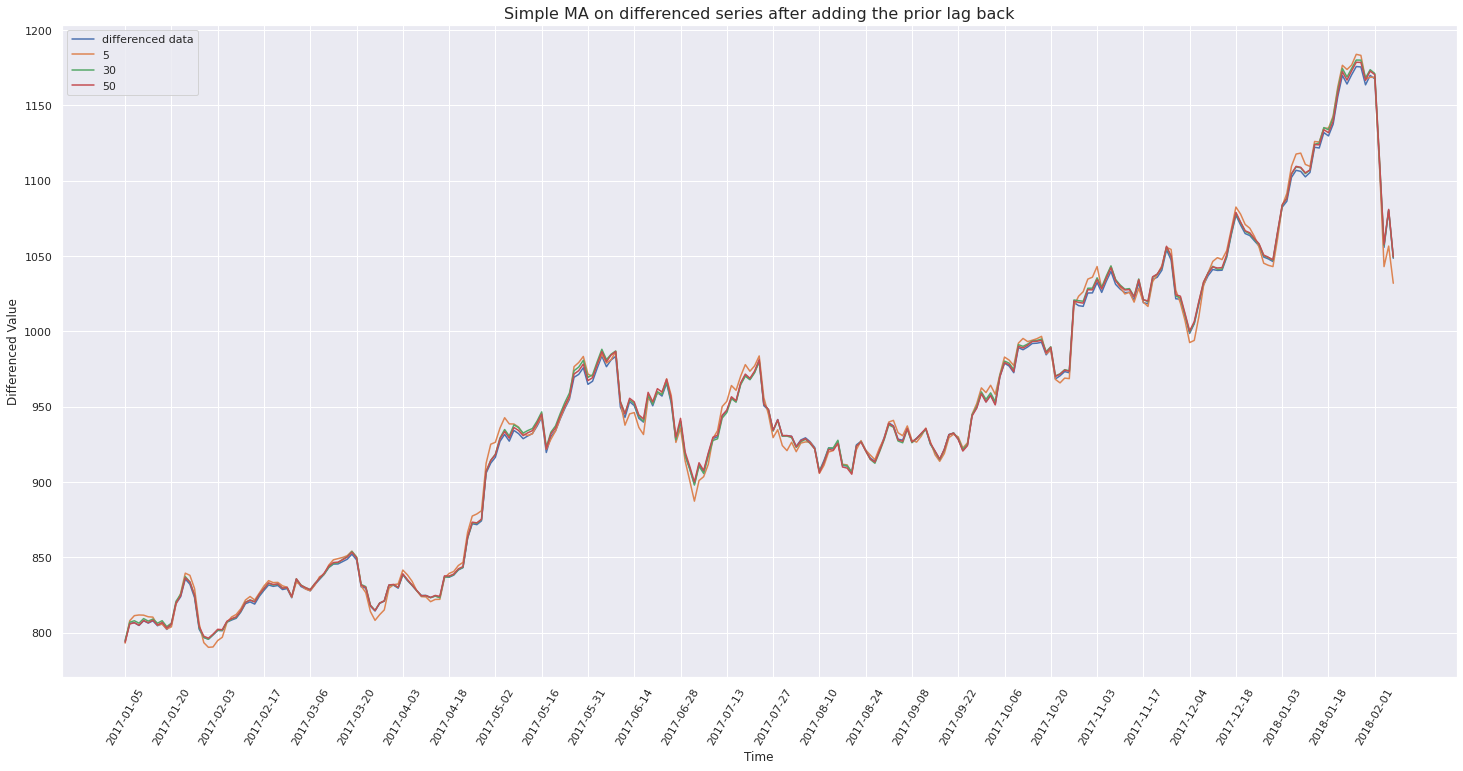

In [85]:
import numpy as np

#creating the differenced dataset
diff_series = (np.array(close[1:]) - np.array(close[:-1]))
diff_time = time[1:]

def ploting(close, series, window1, window2, window3):

  forecast_window1 = []
  forecast_window2 = []
  forecast_window3 = []
  for time in range(len(series) - window1):
    forecast_window1.append(series[time:time + window1].mean())   
  for time in range(len(series) - window2):
    forecast_window2.append(series[time:time + window2].mean())
  for time in range(len(series) - window3):
    forecast_window3.append(series[time:time + window3].mean())
  

  plt.figure(figsize=(25, 12))
  plt.plot(time_valid, close[split_time:], label="differenced data")
  plt.plot(time_valid, np.array(forecast_window1[split_time - 1 - window1:]) + np.array(close[split_time:]), label=window1) #forecasted data + adding back the trend
  plt.plot(time_valid, np.array(forecast_window2[split_time - 1 - window2:]) + np.array(close[split_time:]), label=window2) #forecasted data + adding back the trend
  plt.plot(time_valid, np.array(forecast_window3[split_time - 1 - window3:]) + np.array(close[split_time:]), label=window3) #forecasted data + adding back the trend
  plt.xlabel("Time")
  plt.ylabel("Differenced Value")
  plt.legend(loc="upper left")
  plt.xticks(np.arange(0, len(time_valid)+1, 10))
  plt.xticks(rotation=60)
  plt.title("Simple MA on differenced series after adding the prior lag back", fontsize=16)

  print(f"mean_squared_error for window (diff dataset) {window1}: ", keras.metrics.mean_squared_error(close[split_time:],np.array(forecast_window1[split_time - 1 - window1:]) + np.array(close[split_time:])).numpy())
  print(f"mean_absolute_error for window (diff dataset) {window1}: ", keras.metrics.mean_absolute_error(close[split_time:], np.array(forecast_window1[split_time - 1 - window1:]) + np.array(close[split_time:])).numpy())

  print(f"mean_squared_error for window (diff dataset) {window2}: ", keras.metrics.mean_squared_error(close[split_time:], np.array(forecast_window2[split_time - 1 - window2:]) + np.array(close[split_time:])).numpy())
  print(f"mean_absolute_error for window (diff dataset) {window2}: ", keras.metrics.mean_absolute_error(close[split_time:], np.array(forecast_window2[split_time - 1 - window2:]) + np.array(close[split_time:])).numpy())

  print(f"mean_squared_error for window (diff dataset) {window3}: ", keras.metrics.mean_squared_error(close[split_time:], np.array(forecast_window3[split_time - 1 - window3:]) + np.array(close[split_time:])).numpy())
  print(f"mean_absolute_error for window (diff dataset) {window3}: ", keras.metrics.mean_absolute_error(close[split_time:], np.array(forecast_window3[split_time - 1 - window3:]) + np.array(close[split_time:])).numpy())
  print("")

ploting(close, diff_series, 5, 30, 50)

#Predicting with ARMA, GARCH, ARIMA, SARIMA + PROPHET models


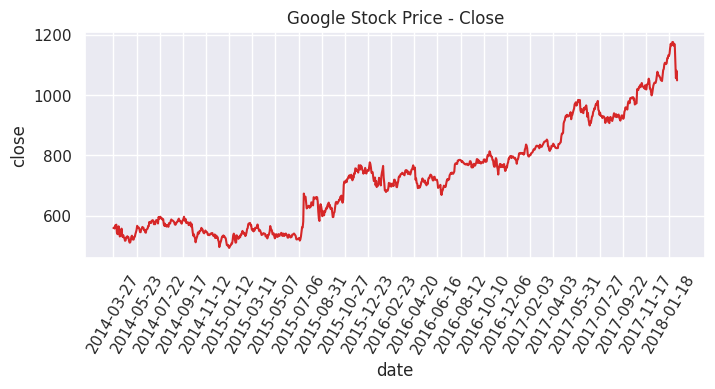

In [6]:

dataset_Google=pd.read_csv("/content/file_destination/individual_stocks_5yr/individual_stocks_5yr/GOOG_data.csv")


def plot_df(df, x, y, title="", xlabel='date', ylabel='close', dpi=100):
    plt.figure(figsize=(8,3), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.xticks(rotation = 60)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(np.arange(0, len(x)+1, 40))
    plt.show()
    

plot_df(dataset_Google, x=dataset_Google['date'], y=dataset_Google['close'], title='Google Stock Price - Close')


ACF and PACF of the closing price to determine the appropriate number of lags having effect on the current value (prior values in the dataset)

ACF

Text(0.5, 1.0, 'ACF Google close')

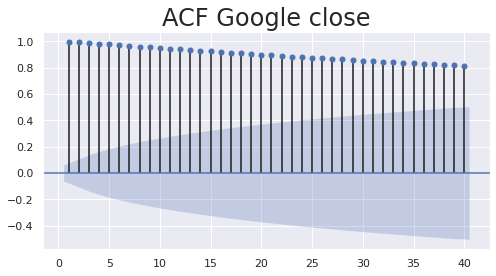

In [9]:
#ACF (captures combined, direct and indirect effect on the current value)  
#We use ACF for MA component of the model
plt.rcParams.update({'figure.figsize': (8,4)})
dataset_Google_close=dataset_Google['close']
plot_acf(dataset_Google_close, lags=40, zero=False);  #drop the current value
plt.title("ACF Google close", size=24) 
#Blue region means significance threshord, here all legs seems to be significant, so
# it suggest time dependence in time in the dataset, and non-stationary dataset, and random walk pattern,
# as we can see exponentional decaying but all legs are significant
#The more lags we include, the better our model will fit the data, but it can lead to overfitting

In [10]:
  #CHECKING ACF ON 1 DIFFERENCED DATASET
  #in case to find out the ARIMA order is useful to check it and furthermore
  #in case of ARMA and GARCH model we can predict only on stationary data.

  #Before diffrencing, let's check whether our data stationary is with DICKEY FULLER TEST
  
  print("p-value (Dickey-Fuller test): ", adfuller(dataset_Google_close)[1])
  #The stationary data's value should be smaller then 0.5

p-value (Dickey-Fuller test):  0.9281780203851916


In [11]:
#Let's remove the trend with one differencing calculationg the return as earlier
dataset_Google_close=pd.DataFrame(dataset_Google_close)
dataset_Google_close['returns']=dataset_Google_close.close.pct_change(1).mul(100)
print("p-value (Dickey-Fuller test): " , adfuller(dataset_Google_close.returns.dropna())[1])
#So the retrun dataset is stationary

p-value (Dickey-Fuller test):  0.0


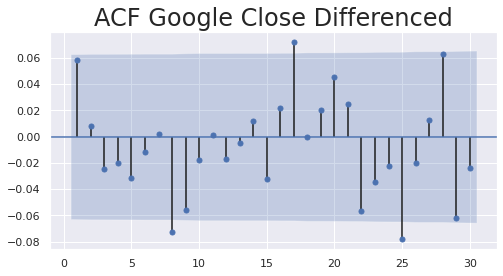

In [12]:
#Another way of to transfrom our dataset to non-stationary, 1 or 2 differcing can help

dataset_Google_close_diff=dataset_Google_close.close.diff(periods=1)  #integrated of order 1, denoted d 
dataset_Google_close_diff=dataset_Google_close_diff[1:]

sgt.plot_acf(dataset_Google_close_diff[1:], lags=30, zero=False)
plt.title("ACF Google Close Differenced", size=24)
plt.show()

#Our differenced dataset is quite similar to a white nose (not having significant correlation regarding the lags), 
#it means that there is no autocorreation in any lag, so for the ARMA or ARIMA model it doesn't provide adequate info.



In [72]:
#we can test whether this differenced dataset has autocorrelation with Durbin Watson test
#if the value is close to  2, it means there is no autocorrelation

print("Durbin-Watson value: ", sm.stats.stattools.durbin_watson(dataset_Google_close_diff[1:].dropna(), axis=0))

Durbin-Watson value:  1.8667229441016666


PACF

Text(0.5, 1.0, 'PACF Google Close')

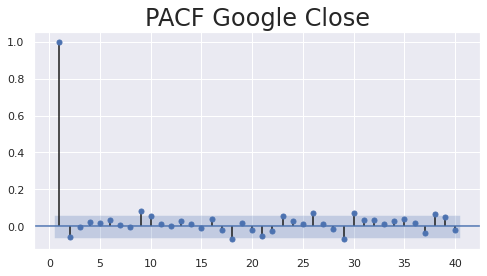

In [75]:
#PACF shows the direct effect on the current value, cancelling out all other leg's effect
#Use it for AR autoregressive model
sgt.plot_pacf(dataset_Google_close, lags=40, zero=False, method=('ols'))  #order least squares
plt.title("PACF Google Close", size=24)
#first element is significant, maybe the second one also, which is negative, having negative effect on today's price
#other lags are not important


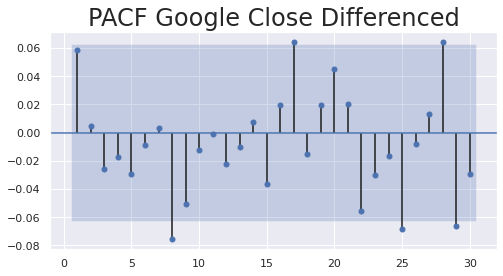

In [111]:

sgt.plot_pacf(dataset_Google_close_diff[1:], lags=30, zero=False)
plt.title("PACF Google Close Differenced", size=24)
plt.show()


White noise is a series that’s not predictable, as it’s a sequence of random numbers. If you build a model and its residuals (the difference between predicted and actual) values look like white noise, then you know you did everything to make the model as good as possible. On the opposite side, there’s a better model for your dataset if there are visible patterns in the residuals. Both ACF and PACF plot on differenced dataset shows, that there is no significant autocorrelation in the dataset, so no need further differencing.

According to the ACF and PCF plot on non-differenced data, it is clear that we have a time series which is a random walk. The only predicting technique on closing price values which can have some success is ARIMA(X )and SARIMA(X). I will use differenced dataset for using ARMA and GARCH models for predicting returns and volatility.

#ARMA </br>
Predicting the retrun. Return means the change in current and prior lag data. <br>ARMA perfrom relatively good only on stationary dataset.

In [16]:
#I don't check AR or MA model separately as AR and MA together more powerful as AR can't react the changes as fast as MA, so MA complete AR.
#For predicting with ARMA we have to make the data stationary(constant mean, variation, no cycles) as it can't work with non-stationary data
#Above I checked if the dataset is non-stationary: 1.) Visually with plotting the data and with additive and multiplicative decomposition
#                                     2.)with the Dickey-Fuller test, we have to get p value under 0.05 if it is a stationary dataset
#As it wasn non-stationary so I will use the differenced dataset for prediction

dataset_Google_close=dataset_Google_close.dropna()

Text(0.5, 1.0, 'Returns')

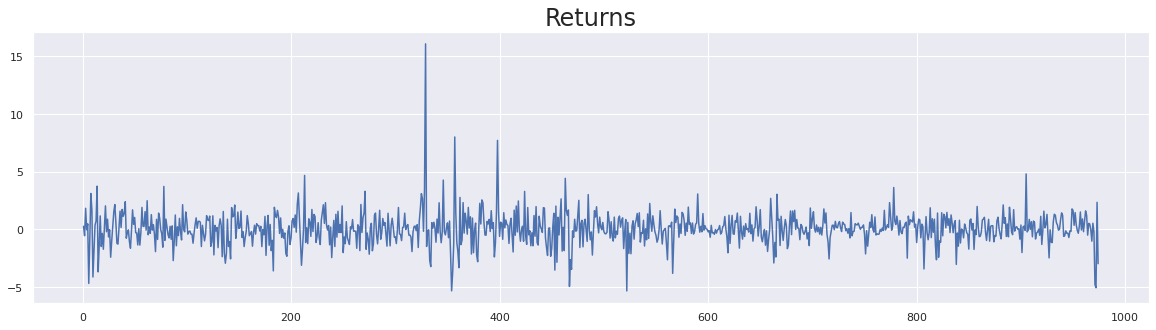

In [17]:
dataset_Google_close['returns'].plot(figsize=(20,5))
plt.title("Returns", size=24)

Model selection </br> (ACF, PACF as checked above doesn't provide useful information on the potential lags, as almost non of them is relevant)

In [ ]:
#Create some  model and check them on the basis log likelihood, AIC, BIC, log likelihood rate figures and residuals
##The best model has the highest Log likelihood and lowest AIC and BIC value
#I would prefer AIC over BIC as it is better for prediction, BIC is better for explanation.
#baseline: 1,1 ARMA model, we use the first leg for the AR and MA components
from statsmodels.tsa.arima_model import ARMA
model_ARMA1_1=ARMA(dataset_Google_close['returns'], order=(1,1))
result_model_ARMA1_1=model_ARMA1_1.fit()
result_model_ARMA1_1.summary()


In [19]:
print("ARMA(1,1):    \t LL= ", result_model_ARMA1_1.llf, "\t AIC = ", result_model_ARMA1_1.aic,  "\t BIC = ", result_model_ARMA1_1.bic, )

ARMA(1,1):    	 LL=  -1712.1553378010278 	 AIC =  3432.3106756020557 	 BIC =  3451.8363208166256


In [ ]:
#other ARMA models
model_ARMA1_2=ARMA(dataset_Google_close['returns'], order=(1,2))
result_model_ARMA1_2=model_ARMA1_2.fit()


model_ARMA2_1=ARMA(dataset_Google_close['returns'], order=(2,1))
result_model_ARMA2_1=model_ARMA2_1.fit()


model_ARMA2_2=ARMA(dataset_Google_close['returns'], order=(2,2))
result_model_ARMA2_2=model_ARMA2_2.fit()

model_ARMA3_2=ARMA(dataset_Google_close['returns'], order=(3,2))
result_model_ARMA3_2=model_ARMA3_2.fit()

model_ARMA2_3=ARMA(dataset_Google_close['returns'], order=(2,3))
result_model_ARMA2_3=model_ARMA2_3.fit()

model_ARMA3_3=ARMA(dataset_Google_close['returns'], order=(3,3))
result_model_ARMA3_3=model_ARMA3_3.fit()

model_ARMA4_3=ARMA(dataset_Google_close['returns'], order=(4,3))
result_model_ARMA4_3=model_ARMA4_3.fit()

model_ARMA3_4=ARMA(dataset_Google_close['returns'], order=(3,4))
result_model_ARMA3_4=model_ARMA3_4.fit()

model_ARMA4_4=ARMA(dataset_Google_close['returns'], order=(4,4))
result_model_ARMA4_4=model_ARMA4_4.fit()

model_ARMA5_4=ARMA(dataset_Google_close['returns'], order=(5,4))
result_model_ARMA5_4=model_ARMA5_4.fit()

model_ARMA4_5=ARMA(dataset_Google_close['returns'], order=(4,5))
result_model_ARMA4_5=model_ARMA4_5.fit()

model_ARMA5_5=ARMA(dataset_Google_close['returns'], order=(5,5))
result_model_ARMA5_5=model_ARMA5_5.fit()

In [31]:
print("ARMA(1,2):    \t LL= ", result_model_ARMA1_2.llf, "\t AIC = ", result_model_ARMA1_2.aic,  "\t BIC = ", result_model_ARMA1_2.bic, )
print("ARMA(2,1):    \t LL= ", result_model_ARMA2_1.llf, "\t AIC = ", result_model_ARMA2_1.aic,  "\t BIC = ", result_model_ARMA2_1.bic, )
print("ARMA(2,2):    \t LL= ", result_model_ARMA2_2.llf, "\t AIC = ", result_model_ARMA2_2.aic,  "\t BIC = ", result_model_ARMA2_2.bic, )
print("ARMA(3,2):    \t LL= ", result_model_ARMA3_2.llf, "\t AIC = ", result_model_ARMA3_2.aic,  "\t BIC = ", result_model_ARMA3_2.bic, )
print("ARMA(2,3):    \t LL= ", result_model_ARMA2_3.llf, "\t AIC = ", result_model_ARMA2_3.aic,  "\t BIC = ", result_model_ARMA2_3.bic, )
print("ARMA(3,3):    \t LL= ", result_model_ARMA3_3.llf, "\t AIC = ", result_model_ARMA3_3.aic,  "\t BIC = ", result_model_ARMA3_3.bic, )
print("ARMA(4,3):    \t LL= ", result_model_ARMA4_3.llf, "\t AIC = ", result_model_ARMA4_3.aic,  "\t BIC = ", result_model_ARMA4_3.bic, )
print("ARMA(3,4):    \t LL= ", result_model_ARMA3_4.llf, "\t AIC = ", result_model_ARMA3_4.aic,  "\t BIC = ", result_model_ARMA3_4.bic, )
print("ARMA(4,4):    \t LL= ", result_model_ARMA4_4.llf, "\t AIC = ", result_model_ARMA4_4.aic,  "\t BIC = ", result_model_ARMA4_4.bic, )
print("ARMA(5,4):    \t LL= ", result_model_ARMA5_4.llf, "\t AIC = ", result_model_ARMA5_4.aic,  "\t BIC = ", result_model_ARMA5_4.bic, )
print("ARMA(4,5):    \t LL= ", result_model_ARMA4_5.llf, "\t AIC = ", result_model_ARMA4_5.aic,  "\t BIC = ", result_model_ARMA4_5.bic, )
print("ARMA(5,5):    \t LL= ", result_model_ARMA5_5.llf, "\t AIC = ", result_model_ARMA5_5.aic,  "\t BIC = ", result_model_ARMA5_5.bic, )


ARMA(1,2):    	 LL=  -1708.814238950941 	 AIC =  3427.628477901882 	 BIC =  3452.035534420095
ARMA(2,1):    	 LL=  -1708.7006788086826 	 AIC =  3427.401357617365 	 BIC =  3451.808414135578
ARMA(2,2):    	 LL=  -1710.3393552219381 	 AIC =  3432.6787104438763 	 BIC =  3461.9671782657315
ARMA(3,2):    	 LL=  -1708.4567372915028 	 AIC =  3430.9134745830056 	 BIC =  3465.083353708503
ARMA(2,3):    	 LL=  -1708.3853100366355 	 AIC =  3430.770620073271 	 BIC =  3464.9404991987685
ARMA(3,3):    	 LL=  -1704.8798895452885 	 AIC =  3425.759779090577 	 BIC =  3464.8110695197174
ARMA(4,3):    	 LL=  -1704.8680092422583 	 AIC =  3427.7360184845165 	 BIC =  3471.6687202172993
ARMA(3,4):    	 LL=  -1702.2236214514626 	 AIC =  3422.447242902925 	 BIC =  3466.379944635708
ARMA(4,4):    	 LL=  -1704.8807370988116 	 AIC =  3429.761474197623 	 BIC =  3478.5755872340483
ARMA(5,4):    	 LL=  -1707.278505417036 	 AIC =  3436.557010834072 	 BIC =  3490.25253517414
ARMA(4,5):    	 LL=  -1705.0685035778838 	 AI

- Let's Check the best ARMA(3,4) model with some test</br>
According to the LL, AIC parameters ARMA(3,4) model is the best, the runner up is ARMA (3,3).

In [34]:

#Let's see with Log Likelihood Ratio test if the difference between the two is significant
#if the p-value is below 0.05 the difference is significant
from scipy.stats import chi2

def LLR_test(mod_1, mod_2, DF=1):   #degree for freedom, hogy 1-gyel különbözik a model
  L1=mod_1.fit().llf
  L2=mod_2.fit().llf
  LR=2*(L2-L1)
  p=chi2.sf(LR, DF).round(3) #khi square method
  return p

print("\nLLR test p-value="+str(LLR_test(model_ARMA3_3,model_ARMA3_4, DF=1)))


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '



LLR test p-value=0.021


Text(0.5, 1.0, 'ACF of Residuals for ARMA(3,4)')

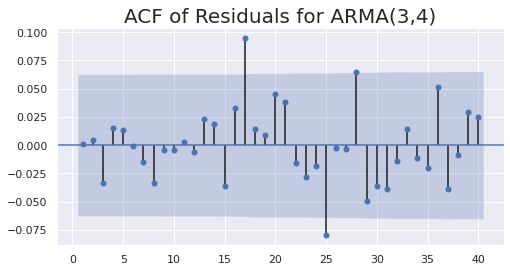

In [36]:
#Let's see the RESIDUALS, if it is not white noise we have to find another model, 
#it is white noise as almost every lags inside the blue shaded area
#especially the first ones, further legs are not so relevant even if they are out of the blue area
dataset_Google_close['residulas']=result_model_ARMA3_4.resid
sgt.plot_acf(dataset_Google_close['residulas'], zero=False, lags=40)
plt.title("ACF of Residuals for ARMA(3,4)", size=20)

In [54]:

train=dataset_Google_close['returns'][:699]
test=dataset_Google_close['returns'][699:]

model_ARMA3_4=ARMA(train, order=(3,4))
model_ARMA3_4_fit=model_ARMA3_4.fit()

predictions= result_model_ARMA3_4.forecast(steps=20, alpha=0.05)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


mean_squared_error:  0.8615467601568536
mean_absolute_error:  0.7060329389637171


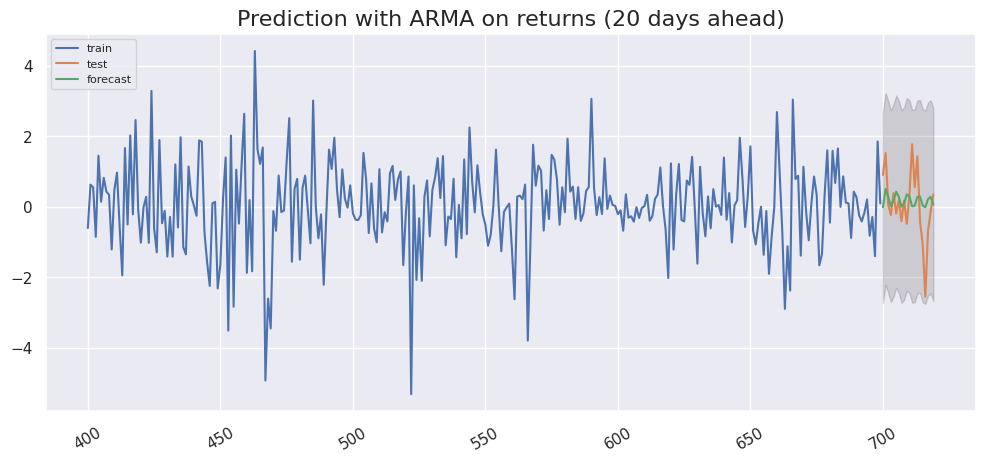

In [56]:


lower=pd.Series(predictions[2][:,0], index=test[:20].index)
upper=pd.Series(predictions[2][:,1], index=test[:20].index)
forecast=pd.Series(predictions[0], index=test[:20].index)


plt.figure(figsize=(12,5), dpi=100)
plt.plot(train[-300:], label='train')
plt.plot(test[:20], label='test')
plt.plot(forecast, label='forecast')
plt.fill_between(lower.index, y1=lower, y2=upper, 
                 color='k', alpha=.15)
plt.xticks(rotation = 30)
plt.title("Prediction with ARMA on returns (20 days ahead)", fontsize=16)
plt.legend(loc='upper left', fontsize=8)



print("mean_squared_error: ", keras.metrics.mean_squared_error(test[:20], predictions[0]).numpy())
print("mean_absolute_error: ", keras.metrics.mean_absolute_error(test[:20], predictions[0]).numpy())


#GARCH model

GARCH, Genralized ARCH model is suitable to predict volatility (numeric measurement of uncertainty), or variance. Normally in time series
we have bursty volatility, when we have one jump in the volatility and it goes back to normal, rather have this pattern than persistent. 
GARCH is modeling burst quite good unlike the ARCH model. 
Investors prefer low risk, low variancy, so if two portfolios provide equal return, but with different volatilities, we choose the lower one.
GARCH and ARCH can predict if there is stability on the market or not, and it can't predict if the price goes up or down.
GARCH consist of several equitation including one for mean one for variance, variance dependent from past periods (square the past Error term ) +
we have a conditional variance(sum of former squared residuals) as well. Conditional variance (hetroscedasticity) unlike 
unconditional changes its value. So in CROSS-SECTIONAL DATA we try to avoid hteroscedasticity, but in Time Series Data we want to model it.
Like ARMA we can use only stationary dataset for prediction, so we work with the return dataset. On that we can see the high
volatility well

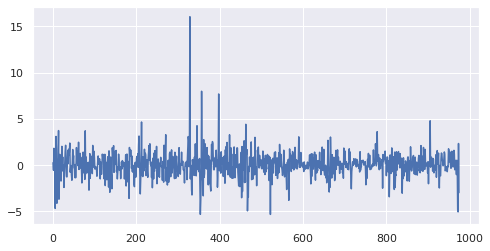

In [60]:
#Check the volatility (magnitude of the residuals)
dataset_Google_close['returns'].plot()

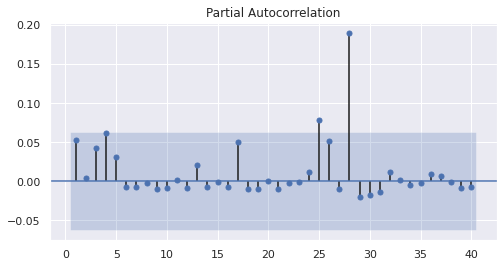

In [74]:
#2. Check which order Garch process we should use
sgt.plot_pacf(dataset_Google_close['returns']**2, lags=40, alpha=0.05, zero=False, method=('ols'));
#PACF shows only lag 25 and 28 are strong , but they are quite far from the current one. 
#So PACF doesn't help this time.

In [ ]:
!pip install arch

In [ ]:
from arch.univariate.volatility import GARCH
from arch import arch_model
model_Garch33=arch_model(dataset_Google_close['returns'], p=1, q=1)
model_Garch33_fit=model_Garch33.fit()
model_Garch33_fit.summary()



/usr/local/lib/python3.8/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


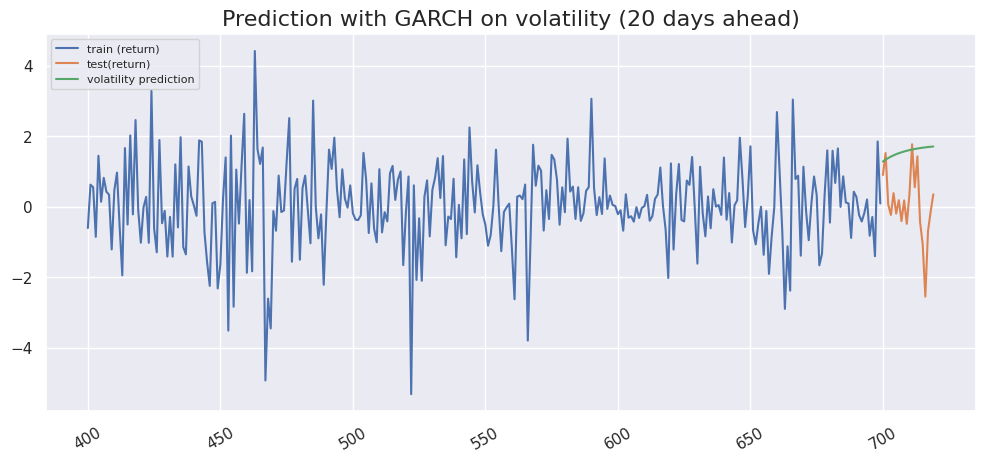

In [110]:
train=dataset_Google_close['returns'][:699]
test=dataset_Google_close['returns'][699:]

model=arch_model(train, p=1, q=1)
model_fit=model.fit(disp="off")

predictions= model_fit.forecast(horizon=20)
forecast=pd.Series(np.sqrt(predictions.variance.values[-1,:]), index=test[:20].index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train[-300:], label='train (return)')
plt.plot(test[:20], label='test(return)')
plt.plot(forecast, label='volatility prediction')
plt.xticks(rotation = 30)
plt.title("Prediction with GARCH on volatility (20 days ahead)", fontsize=16)
plt.legend(loc='upper left', fontsize=8)



GARCH plot predicts what is the direction of the volatility on the market, it doesn't perform prediction on the return values what the blue plot shows.

#ARIMA


ARIMA is capable of predicting on non-stationary data, so now we can attempt to predict the closing price in the future


- ARIMA model 1 (order: 9,1,0)

In [4]:
dataset_Google=pd.read_csv("/content/file_destination/individual_stocks_5yr/individual_stocks_5yr/GOOG_data.csv")
train = dataset_Google.close[:700]
test = dataset_Google.close[700:]



In [20]:
model_arima = ARIMA(train,order=(9, 1, 0))
model_arima_fit = model_arima.fit()

predictions= model_arima_fit.forecast(steps=20, alpha=0.05)

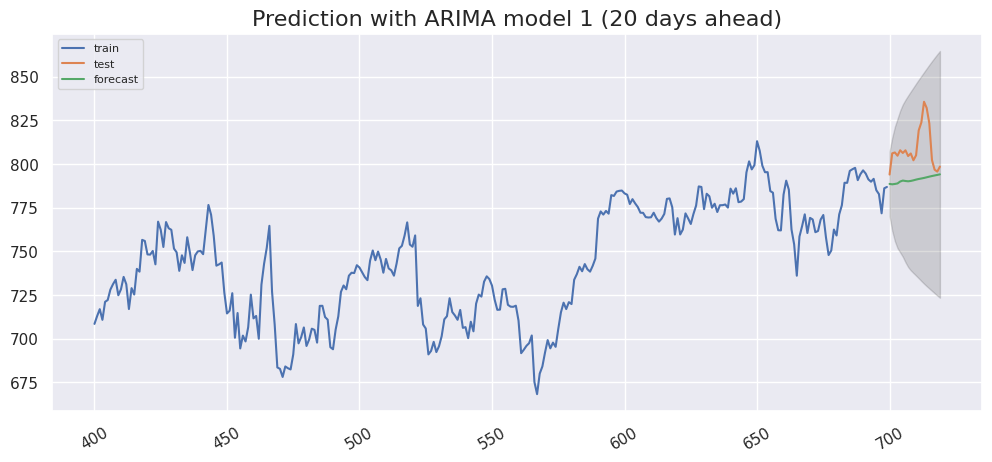

In [21]:
lower=pd.Series(predictions[2][:,0], index=test[:20].index)
upper=pd.Series(predictions[2][:,1], index=test[:20].index)
forecast=pd.Series(predictions[0], index=test[:20].index)


#lower_conversiontolist=lower.to_numpy('str').tolist()
#upper_conversiontolist=upper.to_numpy('str').tolist()

#a=[float(i) for x in lower_conversiontolist for i in x]
#b=[float(i) for x in upper_conversiontolist for i in x]

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train[-300:], label='train')
plt.plot(test[:20], label='test')
plt.plot(forecast, label='forecast')
plt.fill_between(lower.index, y1=lower, y2=upper, 
                 color='k', alpha=.15)
plt.xticks(rotation = 30)
plt.title("Prediction with ARIMA model 1 (20 days ahead)", fontsize=16)
plt.legend(loc='upper left', fontsize=8)


In [146]:
import tensorflow as tf
from tensorflow import keras

print("mean_squared_error: ", keras.metrics.mean_squared_error(test[:20], predictions[0]).numpy())
print("mean_absolute_error: ", keras.metrics.mean_absolute_error(test[:20], predictions[0]).numpy())

mean_squared_error:  445.7524747457188
mean_absolute_error:  17.820935576257227


- ARIMA model 2 (order: 6,1,6)

In [ ]:
#Trying to find the best q, d, q distribution between 0-10

import itertools
p=d=q=range(0,10)
pdq = list(itertools.product(p,d,q))
pdq


In [7]:
import warnings
warnings.filterwarnings('ignore')
List=[]
for param in pdq:
    try:
        
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        List.append([param, model_arima_fit.aic])
        #List.append(param,model_arima_fit.aic)
    except:
        continue

MIN_AIC=[]
for i in range(len(List)):
  if MIN_AIC==[]:
    MIN_AIC.append(List[i])
  
  if float(MIN_AIC[0][1])>float(List[i][1]):
    MIN_AIC=[]
    MIN_AIC.append(List[i])

MIN_AIC

[[(6, 1, 6), 5129.384184124988]]

mean_squared_error:  456.3309524432158
mean_absolute_error:  18.05132461962962


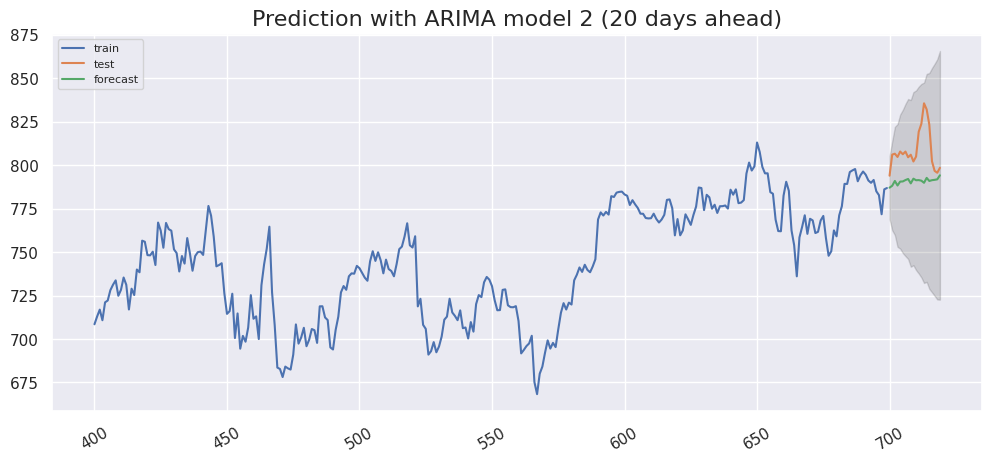

In [19]:
model_arima_2 = ARIMA(train,order=(6, 1, 6))
model_arima_2_fit = model_arima_2.fit()

predictions= model_arima_2_fit.forecast(steps=20, alpha=0.05)

lower=pd.Series(predictions[2][:,0], index=test[:20].index)
upper=pd.Series(predictions[2][:,1], index=test[:20].index)
forecast=pd.Series(predictions[0], index=test[:20].index)


#lower_conversiontolist=lower.to_numpy('str').tolist()
#upper_conversiontolist=upper.to_numpy('str').tolist()

#a=[float(i) for x in lower_conversiontolist for i in x]
#b=[float(i) for x in upper_conversiontolist for i in x]

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train[-300:], label='train')
plt.plot(test[:20], label='test')
plt.plot(forecast, label='forecast')
plt.fill_between(lower.index, y1=lower, y2=upper, 
                 color='k', alpha=.15)
plt.xticks(rotation = 30)
plt.title("Prediction with ARIMA model 2 (20 days ahead)", fontsize=16)
plt.legend(loc='upper left', fontsize=8)

print("mean_squared_error: ", keras.metrics.mean_squared_error(test[:20], predictions[0]).numpy())
print("mean_absolute_error: ", keras.metrics.mean_absolute_error(test[:20], predictions[0]).numpy())


- ARIMA model 3 (order: 1,1,0)</br>
  auto ARIMA model

In [ ]:
!pip install pmdarima



In [9]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm



In [114]:
dataset_Google=pd.read_csv("/content/file_destination/individual_stocks_5yr/individual_stocks_5yr/GOOG_data.csv", index_col=0, parse_dates=True)

# 'Augmented Dickey-Fuller Test’ to check whether the data is stationary or not
from pmdarima.arima import ADFTest
adf_test=ADFTest(alpha=0.05)
adf_test.should_diff(dataset_Google['close'])

(0.2890844037168099, True)

In [10]:
train=dataset_Google['close'][:700]
test=dataset_Google['close'][700:]



In [12]:
model=pm.auto_arima(dataset_Google['close'],
            seasonal=False,
            start_p=0, start_q=0, max_order=10, test='adf', error_action='ignore',
            supress_warnings=True,
            stepwise=True, trae=True)

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  975
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -3606.894
Date:                Thu, 26 Jan 2023   AIC                           7219.788
Time:                        13:36:03   BIC                           7234.432
Sample:                             0   HQIC                          7225.361
                                - 975                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4712      0.318      1.480      0.139      -0.153       1.095
ar.L1          0.0591      0.021      2.814      0.005       0.018       0.100
sigma2        96.3963      1.835     52.541      0.000      92.800      99.992
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5371.63
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.13   Skew:                             0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

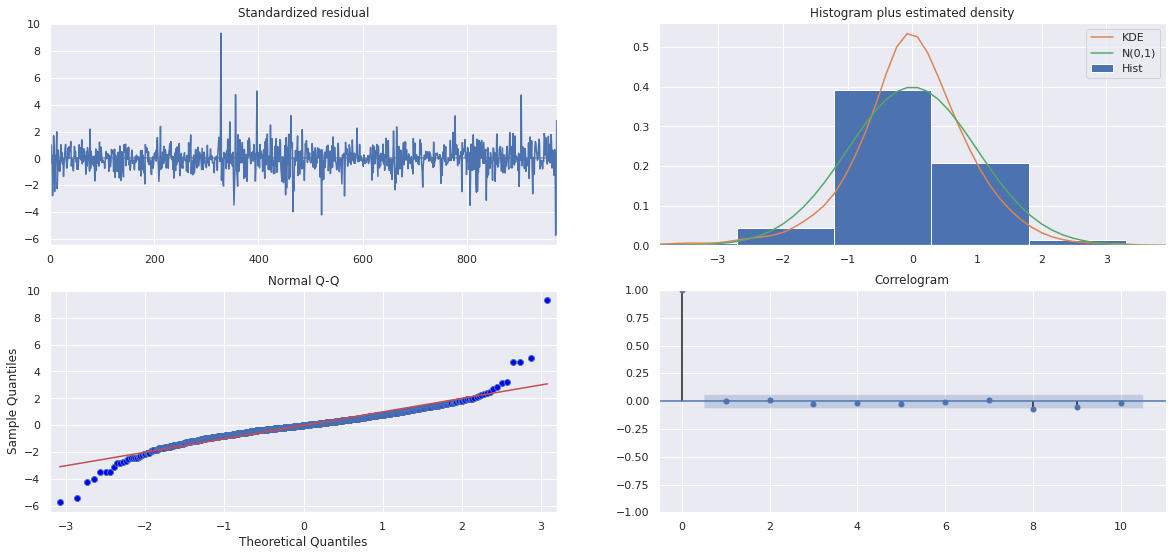

In [119]:
model.plot_diagnostics(figsize=(20,9))
plt.show()

In [14]:
model.fit(train)

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True)

In [22]:
forecast=model.predict(n_periods=20, return_conf_int=True)

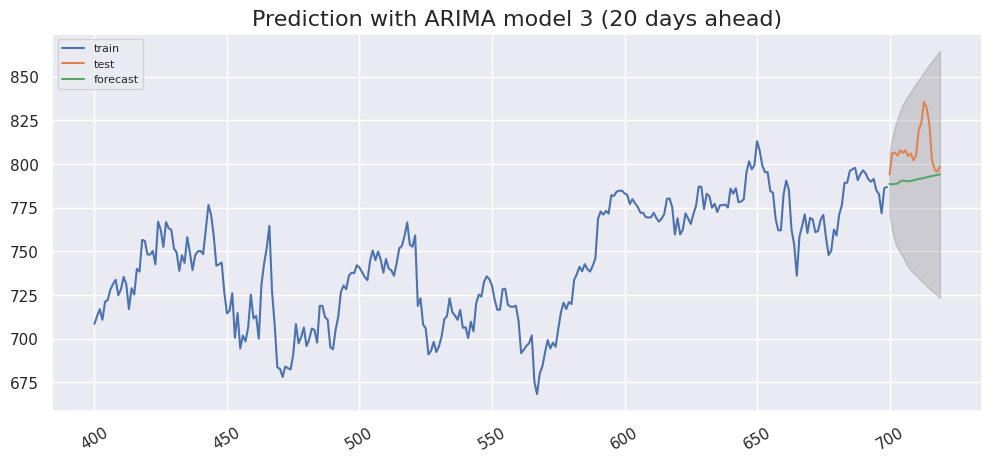

In [23]:
lower=pd.Series(predictions[2][:,0], index=test[:20].index)
upper=pd.Series(predictions[2][:,1], index=test[:20].index)
forecast=pd.Series(predictions[0], index=test[:20].index)


#lower_conversiontolist=lower.to_numpy('str').tolist()
#upper_conversiontolist=upper.to_numpy('str').tolist()

#a=[float(i) for x in lower_conversiontolist for i in x]
#b=[float(i) for x in upper_conversiontolist for i in x]

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train[-300:], label='train')
plt.plot(test[:20], label='test')
plt.plot(forecast, label='forecast')
plt.fill_between(lower.index, y1=lower, y2=upper, 
                 color='k', alpha=.15)
plt.xticks(rotation = 30)
plt.title("Prediction with ARIMA model 3 (20 days ahead)", fontsize=16)
plt.legend(loc='upper left', fontsize=8)


In [17]:
import tensorflow as tf
from tensorflow import keras

print("mean_squared_error: ", keras.metrics.mean_squared_error(test[:20], predictions[0]).numpy())
print("mean_absolute_error: ", keras.metrics.mean_absolute_error(test[:20], predictions[0]).numpy())

mean_squared_error:  445.7524747457188
mean_absolute_error:  17.820935576257227


ARIMA model 1 and 3 produced the best predictions. Actually the predictions are the same. Model 3 is more simple, so the winner is: ARIMA MODEL 3 with order (1,1,0)

#SARIMA

In [56]:
dataset_Google=pd.read_csv("/content/file_destination/individual_stocks_5yr/individual_stocks_5yr/GOOG_data.csv", index_col=0, parse_dates=True)
data = dataset_Google.drop(['open','high','low','volume','Name'],axis=1)
train = dataset_Google.close[:700]
test = dataset_Google.close[700:]

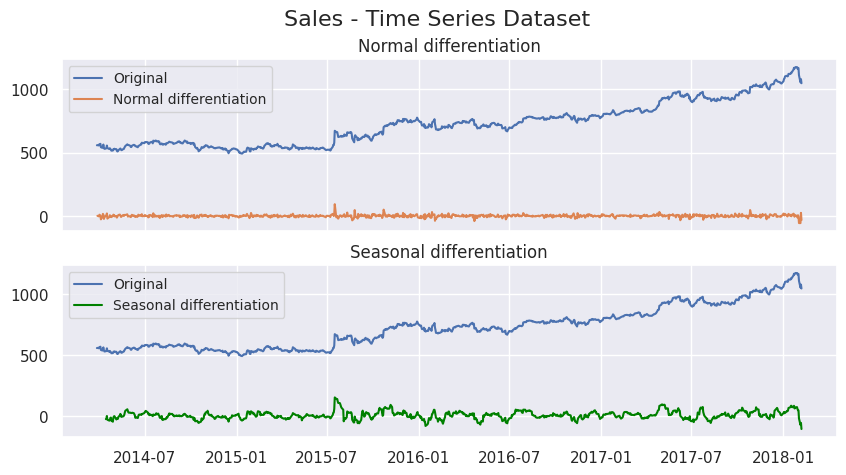

In [32]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Normal differentiation
axes[0].plot(data, label='Original')
axes[0].plot(data.diff(1), label='Normal differentiation')
axes[0].set_title('Normal differentiation')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal differentiation
axes[1].plot(data, label='Original')
axes[1].plot(data.diff(12), label='Seasonal differentiation', color='green')
axes[1].set_title('Seasonal differentiation')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Sales - Time Series Dataset', fontsize=16)
plt.show()

- Sarima model offered by AUTO - ARIMA

In [100]:
import pmdarima as pm

smodel = pm.auto_arima(train, start_p=0, start_q=0,
                         test='adf',
                         max_p=6, max_q=6, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=6598.543, Time=3.11 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=6603.245, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=5341.480, Time=1.64 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=6003.545, Time=2.16 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=6614.502, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=5524.081, Time=0.14 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=5239.562, Time=6.27 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=11.36 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=5.73 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=6582.623, Time=6.23 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=5233.461, Time=7.43 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=5332.440, Time=2.90 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=15.79 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=5.56 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   

In [ ]:
smodel.summary()

In [101]:
#Auto - sarima suggested model ARIMA(2,0,0)(2,1,0)[12]   intercept
smodel.fit(train)
forecast=smodel.predict(n_periods=20, return_conf_int=True)

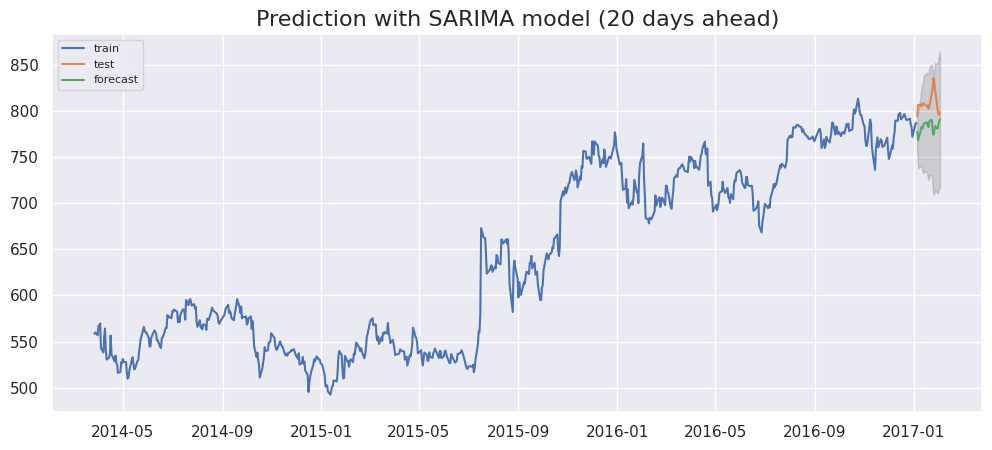

In [102]:
lower=pd.Series(forecast[1][:,0], index=test.index[:20])
upper=pd.Series(forecast[1][:,1], index=test.index[:20])
#Somehow this code drops error: forecast=pd.Series(forecast[0], index=test.index[:20])
indexing=test[:20].index
forecast=pd.Series(forecast[0])
forecast.index=indexing


#lower_conversiontolist=lower.to_numpy('str').tolist()
#upper_conversiontolist=upper.to_numpy('str').tolist()

#a=[float(i) for x in lower_conversiontolist for i in x]
#b=[float(i) for x in upper_conversiontolist for i in x]

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='train')
plt.plot(test[:20], label='test')
plt.plot(forecast, label='forecast')
plt.fill_between(lower.index, y1=lower, y2=upper, 
                 color='k', alpha=.15)
plt.title("Prediction with SARIMA model (20 days ahead)", fontsize=16)
plt.legend(loc='upper left', fontsize=8)


In [103]:
import tensorflow as tf
from tensorflow import keras

print("mean_squared_error: ", keras.metrics.mean_squared_error(test[:20], forecast[0]).numpy())
print("mean_absolute_error: ", keras.metrics.mean_absolute_error(test[:20], forecast[0]).numpy())


mean_squared_error:  1107.2704196387817
mean_absolute_error:  31.249178999435845


- Sarima model with other parameter

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_test= sm.tsa.statespace.SARIMAX(train, order=(3,1,2), seasonal_order=(1,1,1,5)) # enforce_invertibility=False
results=model_test.fit()
results.summary()

In [105]:
#other test model  forecast
start=len(train)
end=len(train)+19
forecast=results.predict(start, end, typ='levels')

In [106]:
import tensorflow as tf
from tensorflow import keras

print("mean_squared_error: ", keras.metrics.mean_squared_error(test[:20], forecast).numpy())
print("mean_absolute_error: ", keras.metrics.mean_absolute_error(test[:20], forecast).numpy())

mean_squared_error:  468.7316590950143
mean_absolute_error:  18.492686991232624


#Prophet

In [ ]:
from fbprophet import Prophet

In [109]:
df=pd.read_csv("/content/file_destination/individual_stocks_5yr/individual_stocks_5yr/GOOG_data.csv")
# Select only the important features i.e. the date and price
data = df[["date","close"]] # select Date and Price# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"date":"ds","close":"y"}) #renaming the columns of the datasetdata.head(5)

In [ ]:
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data[:700]) # fit the model using all data

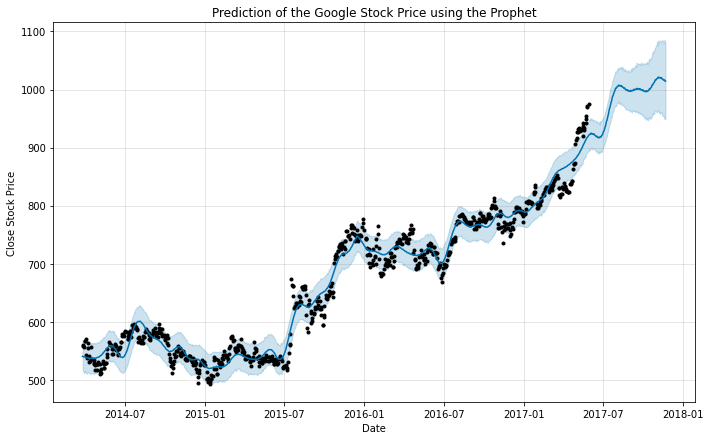

In [ ]:
future = m.make_future_dataframe(periods=20) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Google Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

In [ ]:
prediction.yhat

0        531.676899
1        532.066057
2        532.396779
3        532.866409
4        533.918368
           ...     
1145    1279.013135
1146    1279.356104
1147    1273.530076
1148    1273.667242
1149    1274.223684
Name: yhat, Length: 1150, dtype: float64

In [ ]:
#len(data['y'][800:])
len(prediction.yhat)

975

In [ ]:
import tensorflow as tf
from tensorflow import keras

print("mean_squared_error: ", keras.metrics.mean_squared_error(data['y'][800:], prediction.yhat[800:]).numpy())
print("mean_absolute_error: ", keras.metrics.mean_absolute_error(data['y'][800:], prediction.yhat[800:]).numpy())

mean_squared_error:  3763.5638994509445
mean_absolute_error:  50.271243840459896


#Predicting with neural network

Predicting with LSTM models

In [263]:
dataset_Google=pd.read_csv("/content/file_destination/individual_stocks_5yr/individual_stocks_5yr/GOOG_data.csv", index_col=0, parse_dates=True)
data = dataset_Google.drop(['open','high','low','volume','Name'],axis=1)
train = dataset_Google.close[:700]
test = dataset_Google.close[700:]

In [264]:

train=pd.DataFrame(train)
test=pd.DataFrame(test)

In [265]:
#scaling data (independent also in case of RNN)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [266]:
#Creating the windows

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
length=5   
batch_size=1
generator=TimeseriesGenerator(scaled_train, scaled_train, length=length, 
                              batch_size=batch_size)

validation_generator=TimeseriesGenerator(scaled_test, scaled_test,
                                         length=length,  batch_size=1)

In [267]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
n_features=1  #one X

In [277]:
#callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

callbacks=[
  EarlyStopping(monitor='val_loss', patience=5),
  ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
  ModelCheckpoint('model.h5', verbose=1, save_best_only=True, save_weights_only=True)
  ]

In [278]:
model=Sequential()
#model.add(SimpleRNN(20, input_shape=(length, n_features)))
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit_generator(generator, epochs=20, validation_data=validation_generator, callbacks=callbacks)

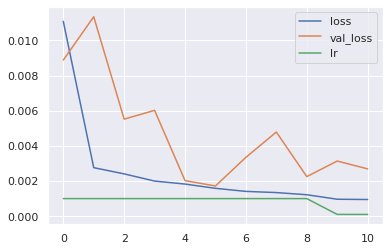

In [280]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
#evaluate the test data
test_predictions=[]
first_eval_batch = scaled_train[-length:]
current_batch=first_eval_batch.reshape((1, length, n_features))

for i in range(20):
  current_pred=model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

In [282]:
true_predictions=scaler.inverse_transform(test_predictions)
true_predictions=true_predictions.squeeze(-1)

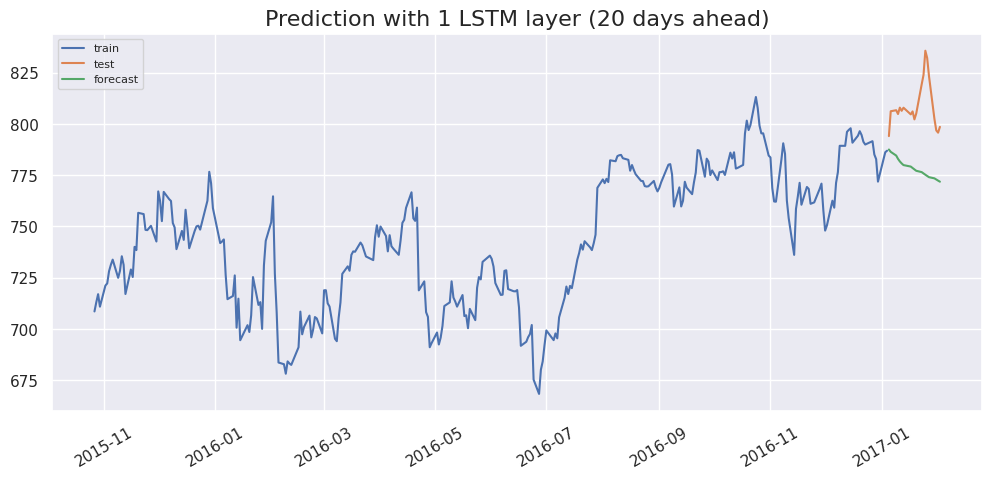

In [283]:
forecast=pd.Series(true_predictions, index=test.close[:20].index)


#lower_conversiontolist=lower.to_numpy('str').tolist()
#upper_conversiontolist=upper.to_numpy('str').tolist()

#a=[float(i) for x in lower_conversiontolist for i in x]
#b=[float(i) for x in upper_conversiontolist for i in x]

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train[-300:], label='train')
plt.plot(test.close[:20], label='test')
plt.plot(forecast, label='forecast')
plt.xticks(rotation = 30)
plt.title("Prediction with 1 LSTM layer (20 days ahead)", fontsize=16)
plt.legend(loc='upper left', fontsize=8)

In [284]:
import tensorflow as tf
from tensorflow import keras

print("mean_squared_error: ", keras.metrics.mean_squared_error(test.close[:20], forecast).numpy())
print("mean_absolute_error: ", keras.metrics.mean_absolute_error(test.close[:20], forecast).numpy())

mean_squared_error:  1127.2708680288931
mean_absolute_error:  30.847111098289464


#Bidirectional LSTM

In [285]:
#normalization just with max values
import numpy as np
dataset_Google=pd.read_csv("/content/file_destination/individual_stocks_5yr/individual_stocks_5yr/GOOG_data.csv")
Google_dataset_conversiontolist=pd.DataFrame(dataset_Google['close'])
feature_name=['close']

train = dataset_Google.close[:700]
valid = dataset_Google.close[700:800]
test = dataset_Google.close[800:]
train=pd.DataFrame(train)
valid=pd.DataFrame(valid)
test=pd.DataFrame(test)

max_value = Google_dataset_conversiontolist['close'].max()
#min_value = Google_dataset_conversiontolist['close'].min()

normalized_dataset = Google_dataset_conversiontolist.copy()
for feature_name in Google_dataset_conversiontolist.columns:
    max_value = Google_dataset_conversiontolist[feature_name].max()
    #min_value = Google_dataset_conversiontolist[feature_name].min()
    normalized_dataset[feature_name] = Google_dataset_conversiontolist[feature_name] / max_value

normalized_dataset=normalized_dataset.values

lookback=30
total_size=len(normalized_dataset)
X=[]
y=[]
for i in range(0, total_size-lookback): # loop data set with margin 50 as we use 50 days data for prediction

  t=[]
  for j in range(0, lookback): # loop for 50 days
      current_index = i+j
      t.append(normalized_dataset[current_index])
      #t.append(list(np.asarray((Google_dataset_conversiontolist[current_index]), dtype=np.float32)/b)) # get data margin from 50 days with marging i
    
  X.append(t)
  y.append(normalized_dataset[lookback+i][0])

train=pd.DataFrame(train)
test=pd.DataFrame(test)

x_train=np.asarray(X[:700])
x_valid=np.asarray(X[700:800])
x_test=np.asarray(X[800:])

y_train=np.asarray(y[:700])
y_valid=np.asarray(y[700:800])
y_test=np.asarray(y[800:])
X, y= np.array(X), np.array(y)


In [ ]:
#model 2

import tensorflow as tf
from tensorflow import keras



model_2 = tf.keras.models.Sequential([
 # tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),  #solve the dimensional problems Rnn takes 3 dimensons batch time stamp dimensional params
  #                    input_shape=[None]),                              
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 200)
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.00001, momentum=0.9)
model_2.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model_2.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_valid, y_valid))

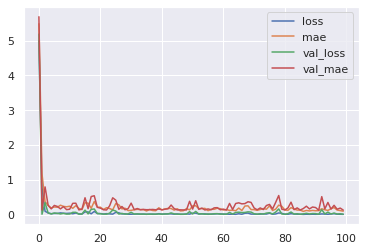

In [303]:
losses=pd.DataFrame(model_2.history.history)
losses.plot()

In [ ]:
#predicting on the test data 
test_predictions=[]
first_eval_batch = x_train[-1]
current_batch=first_eval_batch.reshape((1, lookback, 1))

for i in range(20):
  current_pred=model_2.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

true_predictions=[float(i)*max_value for i in test_predictions]

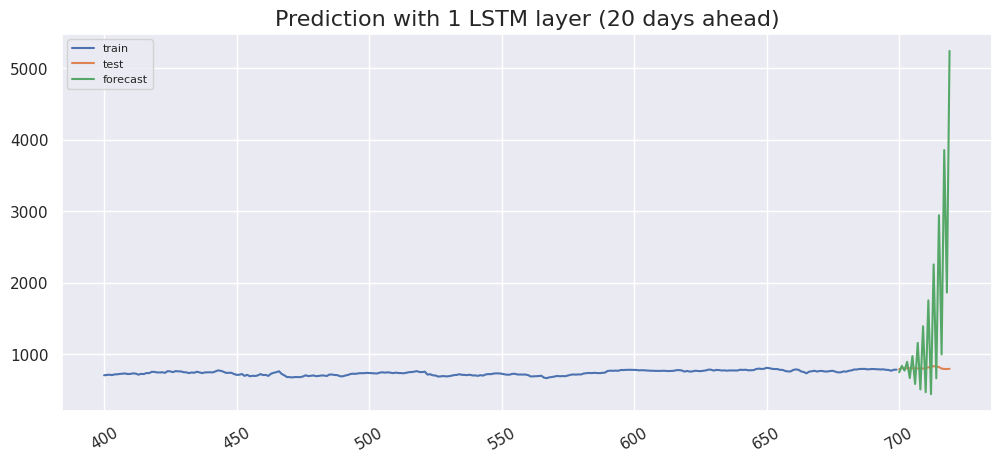

In [305]:
forecast=pd.Series(true_predictions, index=valid.close[:20].index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train[-300:], label='train')
plt.plot(valid.close[:20], label='test')
plt.plot(forecast, label='forecast')
plt.xticks(rotation = 30)
plt.title("Prediction with LSTM model 2 (20 days ahead)", fontsize=16)
plt.legend(loc='upper left', fontsize=8)

In [306]:
import tensorflow as tf
from tensorflow import keras

print("mean_squared_error: ", keras.metrics.mean_squared_error(valid.close[:20], forecast).numpy())
print("mean_absolute_error: ", keras.metrics.mean_absolute_error(valid.close[:20], forecast).numpy())

mean_squared_error:  1930227.9805978746
mean_absolute_error:  804.7459296898842


In [ ]:
#Model 3 ---the best LSTM Model for time series

from keras import Sequential
from keras.layers import Dense, LSTM

model_3 = Sequential()
model_3.add(LSTM(50, return_sequences= True, activation='relu', input_shape=(X.shape[1], 1)))
model_3.add(LSTM(50, return_sequences=True, activation='relu'))
model_3.add(LSTM(50))
model_3.add(Dense(1))

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model.h5', verbose=1, save_best_only=True, save_weights_only=True)]

model_3.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

history = model_3.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_valid, y_valid), callbacks=callbacks)

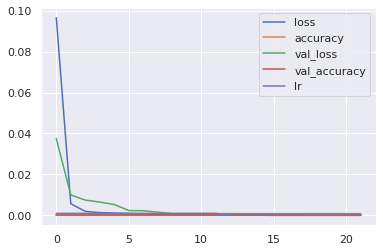

In [310]:
losses=pd.DataFrame(model_3.history.history)
losses.plot()

In [ ]:
#predicting on the test data 
test_predictions=[]
first_eval_batch = x_train[-1]
current_batch=first_eval_batch.reshape((1, lookback, 1))

for i in range(20):
  current_pred=model_3.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

true_predictions=[float(i)*max_value for i in test_predictions]





mean_squared_error:  279.74636633183275
mean_absolute_error:  14.434651138782453


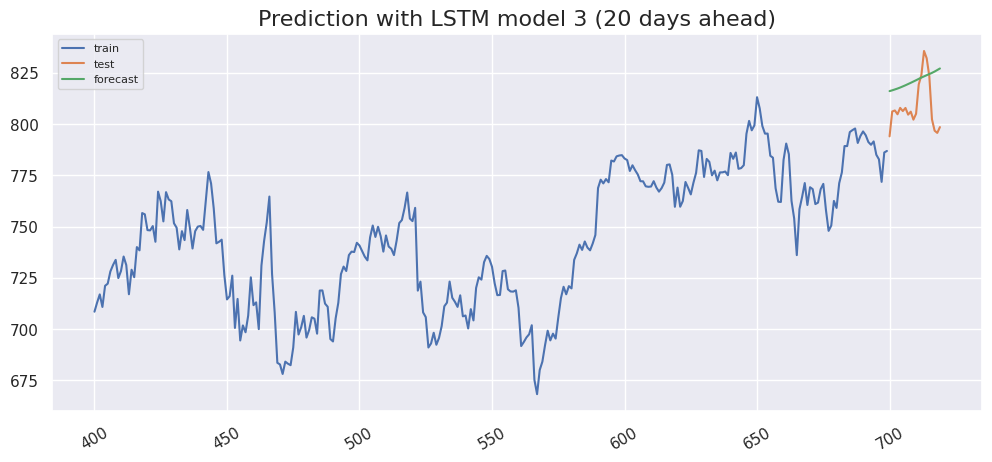

In [313]:
forecast=pd.Series(true_predictions, index=valid.close[:20].index)


plt.figure(figsize=(12,5), dpi=100)
plt.plot(train[-300:], label='train')
plt.plot(valid.close[:20], label='test')
plt.plot(forecast, label='forecast')
plt.xticks(rotation = 30)
plt.title("Prediction with LSTM model 3 (20 days ahead)", fontsize=16)
plt.legend(loc='upper left', fontsize=8)

import tensorflow as tf
from tensorflow import keras

print("mean_squared_error: ", keras.metrics.mean_squared_error(valid.close[:20], forecast).numpy())
print("mean_absolute_error: ", keras.metrics.mean_absolute_error(valid.close[:20], forecast).numpy())

In [ ]:
#model 4

In [ ]:
split_time=700
time_train=time[:700]
x_train=close[:700]
time_valid=time[700:]
x_valid=np.array(close[700:])


window_size=50
batch_size=16
shuffle_buffer_size = 700

x_train_norm=[]
for i in x_train:
  x_train_norm.append(i/max(close))

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    #series = tf.expand_dims(series, axis=-1)   # expand the dimension to be 3
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

#layer = preprocessing.Normalization()
#layer.adapt(x_train)
#x_train = layer(x_train)



dataset = windowed_dataset(x_train_norm, window_size, batch_size, shuffle_buffer_size)

In [ ]:
a=[x for x in dataset]
a[0]

In [ ]:
#normalizing for LSTM
x_valid_norm=[i/max(close) for i in x_valid]

In [ ]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),  #solve the dimensional problems Rnn takes 3 dimensons batch time stamp dimensional params
                      input_shape=[None]),                              
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, ]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 200)
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.00001, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset,epochs=100)

#END OF THE PROJECT ########################x

In [152]:
#normalization just with max values
import numpy as np
dataset_Google=pd.read_csv("/content/file_destination/individual_stocks_5yr/individual_stocks_5yr/GOOG_data.csv")
Google_dataset_conversiontolist=dataset_Google[['open', 'high', 'low', 'volume', 'close']]
feature_name=['open', 'high', 'low', 'volume', 'close']

max_value = Google_dataset_conversiontolist['close'].max()
#min_value = Google_dataset_conversiontolist['close'].min()

normalized_dataset = Google_dataset_conversiontolist.copy()
for feature_name in Google_dataset_conversiontolist.columns:
    max_value = Google_dataset_conversiontolist[feature_name].max()
    #min_value = Google_dataset_conversiontolist[feature_name].min()
    normalized_dataset[feature_name] = Google_dataset_conversiontolist[feature_name] / max_value

normalized_dataset=normalized_dataset.values

lookback=50
total_size=len(normalized_dataset)
X=[]
y=[]
for i in range(0, total_size-lookback): # loop data set with margin 50 as we use 50 days data for prediction

  t=[]
  for j in range(0, lookback): # loop for 50 days
      current_index = i+j
      t.append(normalized_dataset[current_index])
      #t.append(list(np.asarray((Google_dataset_conversiontolist[current_index]), dtype=np.float32)/b)) # get data margin from 50 days with marging i
    
  X.append(t)
  y.append(normalized_dataset[lookback+i][4])




x_train=np.asarray(X[:700])
x_valid=np.asarray(X[700:800])
x_test=np.asarray(X[800:])

y_train=np.asarray(y[:700])
y_valid=np.asarray(y[700:800])
y_test=np.asarray(y[800:])
X, y= np.array(X), np.array(y)


In [ ]:
#model 1

import tensorflow as tf
from tensorflow import keras


model = tf.keras.models.Sequential([
 # tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),  #solve the dimensional problems Rnn takes 3 dimensons batch time stamp dimensional params
  #                    input_shape=[None]),                              
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 5]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 200)
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.00001, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_valid, y_valid))

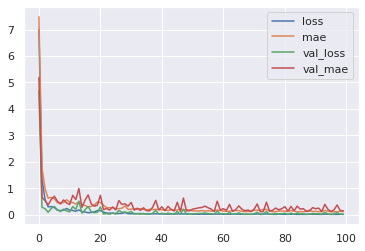

In [154]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
predicted_value = model.predict(x_test)
predicted_value=predicted_value * max_value
y_test=y_test *max_value

In [ ]:
#evaluate the test data
test_predictions=[]
first_eval_batch = scaled_train[-length:]
current_batch=first_eval_batch.reshape((1, length, n_features))

for i in range(20):
  current_pred=model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

In [ ]:
#model 2

model = tf.keras.models.Sequential([
 # tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),  #solve the dimensional problems Rnn takes 3 dimensons batch time stamp dimensional params
  #                    input_shape=[None]),                              
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 5]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 200)
])

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model.h5', verbose=1, save_best_only=True, save_weights_only=True)]

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_valid, y_valid), callbacks=callbacks)

In [ ]:
#Model 3 ---the best LSTM Model for time series

from keras import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50, return_sequences= True, activation='relu', input_shape=(X.shape[1], 5)))
model.add(LSTM(50, return_sequences=True, activation='relu'))
model.add(LSTM(50))
model.add(Dense(1))

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model.h5', verbose=1, save_best_only=True, save_weights_only=True)]

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_valid, y_valid), callbacks=callbacks)

In [ ]:
#Prediction


predicted_value = model.predict(x_test)
predicted_value=predicted_value * max_value
y_test=y_test *max_value

In [ ]:
history.history

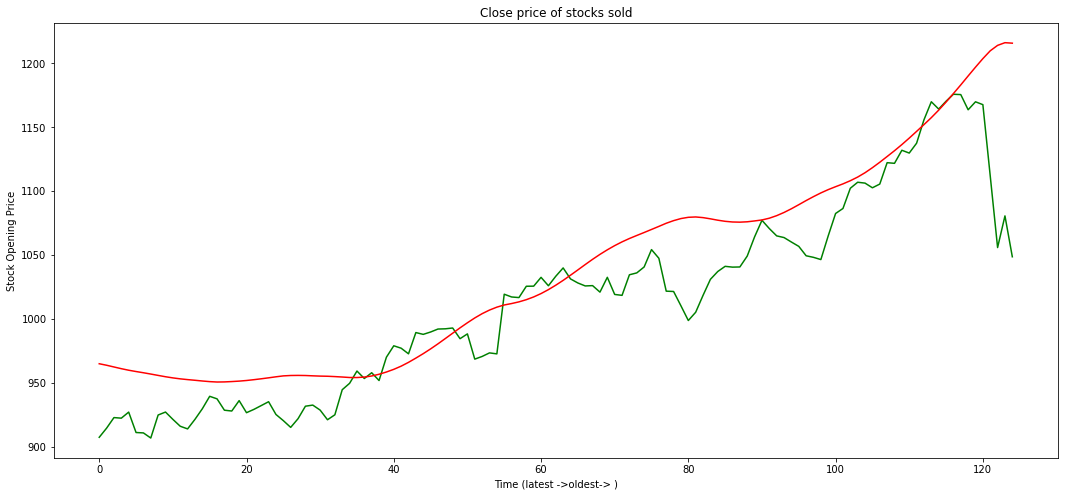

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(y_test, color='green')
plt.plot(predicted_value, color= 'red')

plt.title("Close price of stocks sold")
plt.xlabel("Time (latest ->oldest-> )")
plt.ylabel("Stock Opening Price")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras

y_test=y_test.tolist()
predicted_value=predicted_value.tolist()
predicted_value=[i for x in predicted_value for i in x]

tf.keras.metrics.mean_absolute_error(y_test, predicted_value).numpy()

27.396667

In [ ]:
#My first "0" LSTM model, which seems to give the best result


split_time=700
time_train=time[:700]
x_train=close[:700]
time_valid=time[700:]
x_valid=np.array(close[700:])


window_size=50
batch_size=16
shuffle_buffer_size = 700




x_train_norm=[]
for i in x_train:
  x_train_norm.append(i/max(close))
  


In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    #series = tf.expand_dims(series, axis=-1)   # expand the dimension to be 3
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

#layer = preprocessing.Normalization()
#layer.adapt(x_train)
#x_train = layer(x_train)



dataset = windowed_dataset(x_train_norm, window_size, batch_size, shuffle_buffer_size)

In [ ]:
a=[x for x in dataset]
a[0]

In [ ]:
#normalizing for LSTM
x_valid_norm=[i/max(close) for i in x_valid]

In [ ]:
#using Conv1D layer

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),  #solve the dimensional problems Rnn takes 3 dimensons batch time stamp dimensional params
                      input_shape=[None]),                              
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, ]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 200)
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.00001, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset,epochs=100)

In [ ]:


#simple model without conv1D

from keras import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Lambda

model = Sequential()
model.add(Lambda(lambda x: tf.expand_dims(x, axis=-1),  #solve the dimensional problems Rnn takes 3 dimensons batch time stamp dimensional params
                      input_shape=[None]))
model.add(LSTM(50, return_sequences= True, activation='relu', input_shape=(None, )))
model.add(LSTM(50, return_sequences=True, activation='relu'))
model.add(LSTM(50))
model.add(Dense(1))

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model.h5', verbose=1, save_best_only=True, save_weights_only=True)]

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

history = model.fit(dataset, epochs=100, batch_size=32, callbacks=callbacks)

In [ ]:
forecast = []

for time in range(len(x_valid_norm) - window_size):
  series=x_valid_norm[time:time + window_size]
  series=tf.expand_dims(series, axis=-1)
  series=tf.expand_dims(series, axis=0)
  forecast.append(model.predict(series))


results = np.array(forecast)[:, 0, 0]

In [ ]:
results_back=[i*max(close) for i in results]

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid[window_size:], results_back).numpy()

16.50552457576322

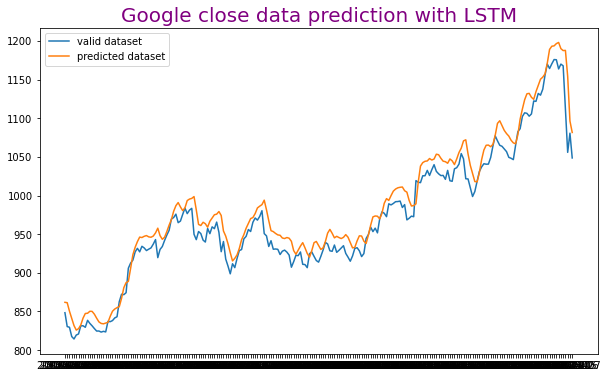

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Google close data prediction with LSTM', fontsize=20, color='purple')
plt.plot(time_valid[window_size:], x_valid[window_size:], label="valid dataset")
plt.plot(time_valid[window_size:], results_back, label="predicted dataset")
plt.legend(loc="upper left")

Could it be possible that LSTM performs worse on this stock data then the single layer neural network? May I do something wrong with the normalization or creating the model?

In [ ]:
#LSTM model of SARA (using all the columns in the dataset)

df=pd.read_csv("/content/file_destination/individual_stocks_5yr/individual_stocks_5yr/GOOG_data.csv")
input_feature = df[['open', 'high', 'low', 'volume', 'close']]
input_data = input_feature.values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
input_data[:,:] = scaler.fit_transform(input_data[:,:])



In [ ]:
lookback=50
total_size=len(df)
X=[]
y=[]
for i in range(0, total_size-lookback): # loop data set with margin 50 as we use 50 days data for prediction
    t=[]
    for j in range(0, lookback): # loop for 50 days
        current_index = i+j
        t.append(input_data[current_index, :]) # get data margin from 50 days with marging i
    X.append(t)
    y.append(input_data[lookback+i, 4])


In [ ]:
import numpy as np

test_size=100 # 100 days for testing data
X, y= np.array(X), np.array(y)
X_test = X[:test_size]
Y_test = y[:test_size]

X_work = X[test_size:]
y_work = y[test_size:]

validate_size = 10

X_valid = X[:validate_size]
y_valid = y[:validate_size]
X_train = X[validate_size:]
y_train = y[validate_size:]
#???? test apart from the first 10 elements is almost the same as train

In [ ]:
X_train = X_train.reshape(X_train.shape[0], lookback, 5)
X_valid = X_valid.reshape(X_valid.shape[0], lookback, 5)
X_test = X_test.reshape(X_test.shape[0], lookback, 5)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(915, 50, 5)
(10, 50, 5)
(100, 50, 5)


In [ ]:
from keras import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50, return_sequences= True, activation='relu', input_shape=(X.shape[1], 5)))
model.add(LSTM(50, return_sequences=True, activation='relu'))
model.add(LSTM(50))
model.add(Dense(1))
model.summary()

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid), callbacks=callbacks)
#? put the whole dataset for the learning not just the closing part?????

In [ ]:
predicted_value = model.predict(X_test)

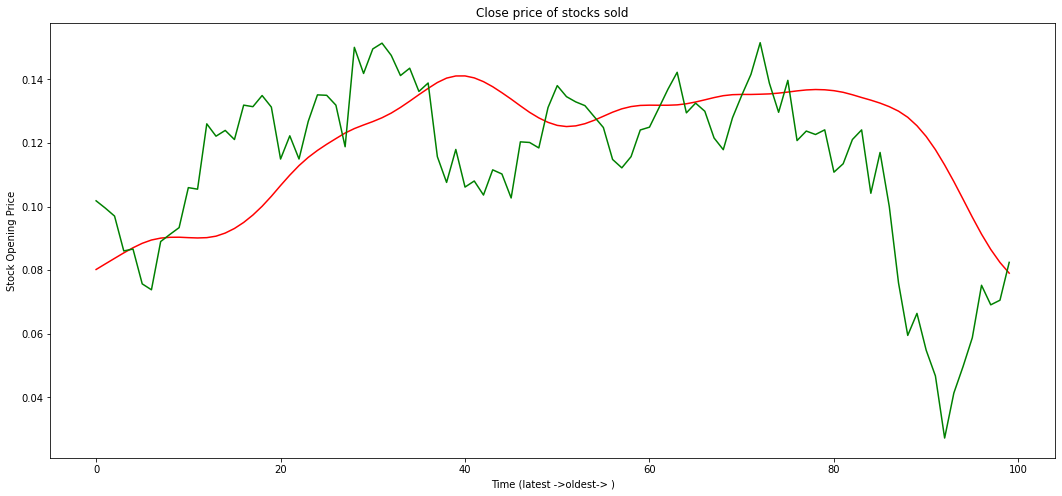

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(predicted_value, color= 'red')
plt.plot(Y_test, color='green')
plt.title("Close price of stocks sold")
plt.xlabel("Time (latest ->oldest-> )")
plt.ylabel("Stock Opening Price")
plt.show()

In [ ]:
dataset_Google=pd.read_csv("/content/file_destination/individual_stocks_5yr/individual_stocks_5yr/GOOG_data.csv", index_col=0, parse_dates=True)

In [94]:
dataset_Google.index[1]

1

Text(0.5, 1.0, 'ACF Google Close')

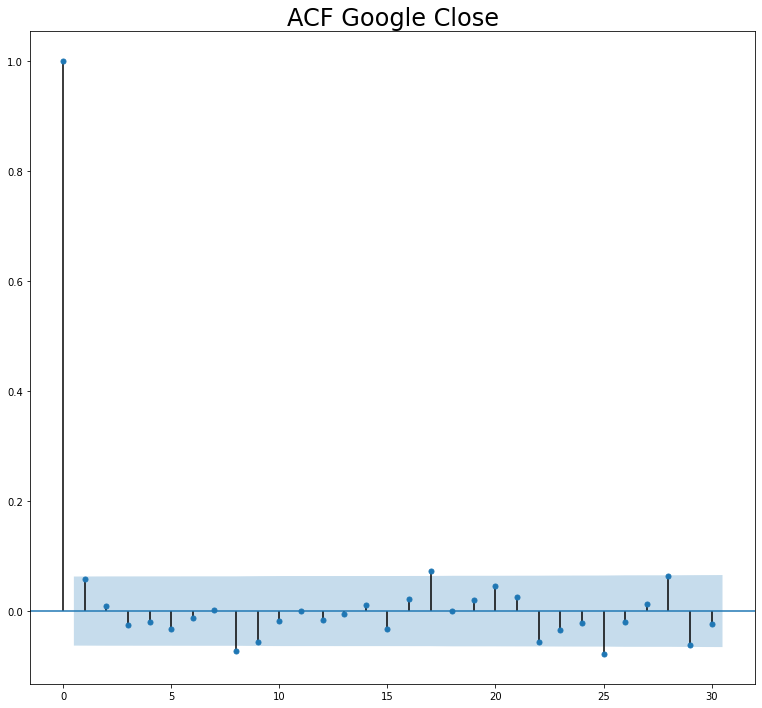

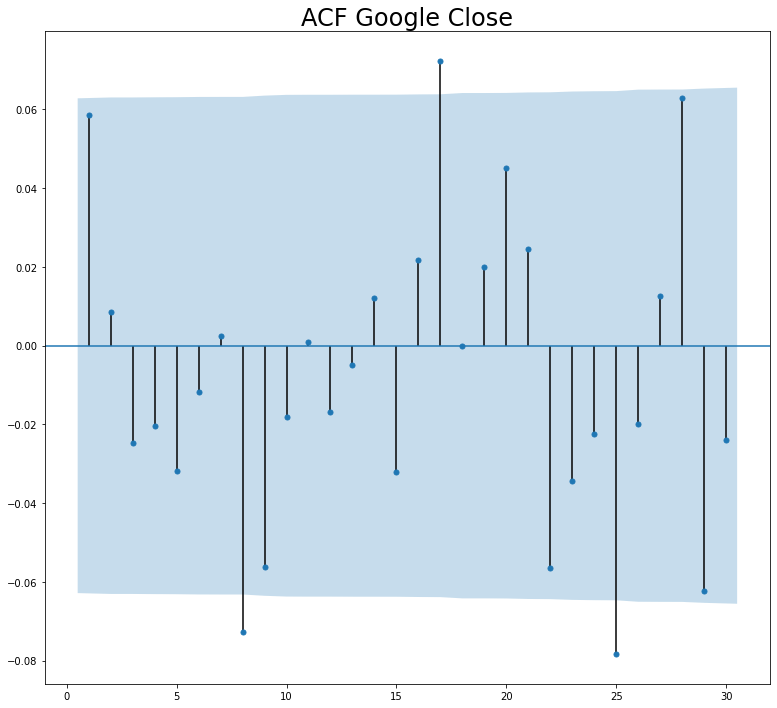

In [ ]:
#With using sgt, negative value may mean some natural adjustment on the market, and ACF and PACF is almost the same
#which may mean that the price today moves in the opposite direction as yesterday

import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(dataset_Google_close_diff[1:], lags=30, zero=False)
plt.title("ACF Google Close", size=24)
plt.show()

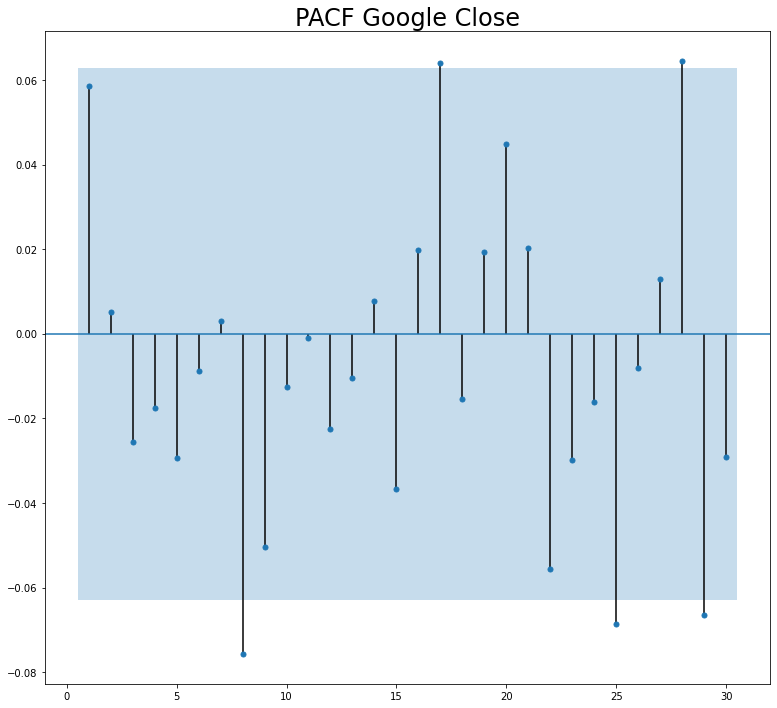

In [ ]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_pacf(dataset_Google_close_diff[1:], lags=30, zero=False)
plt.title("PACF Google Close", size=24)
plt.show()

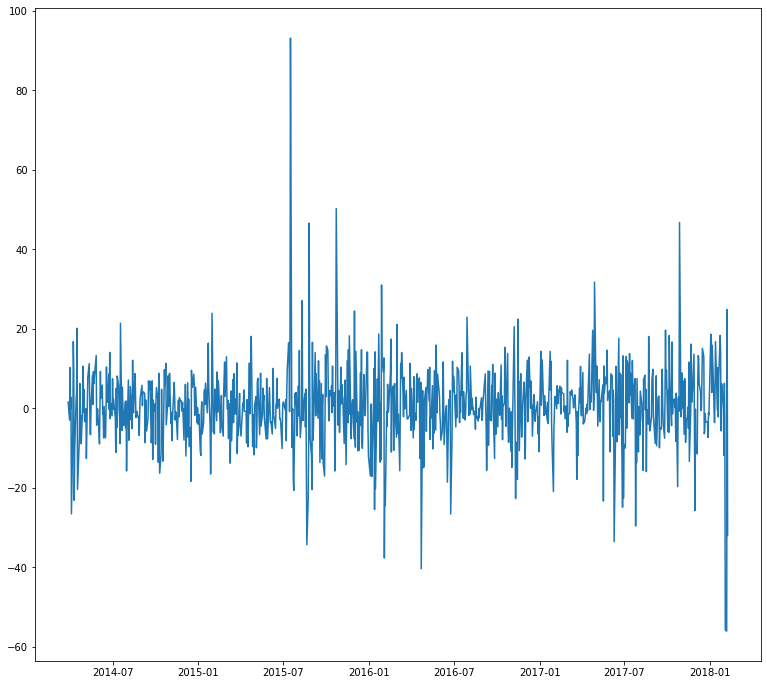

In [ ]:
plt.plot(dataset_Google_close_diff)

In [ ]:
train=dataset_Google['close'][:900].values
test=dataset_Google['close'][900:].values
prediction=[]


In [ ]:
#_____________AR_________________



from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

model_ar = AR(train)
model_ar_fit = model_ar.fit()


In [ ]:
predictions = model_ar_fit.predict(start=900,end=975)


In [ ]:
plt.plot(test)
plt.plot(predictions, color="red")

In [ ]:
#_____________ARMA_________________


from statsmodels.tsa.arima_model import ARMA
model_arma = ARMA(train, order=(1, 0))
model_arma_fit = model_arma.fit()
model_arma_fit.summary()


In [ ]:
#it seems that in case of ARMA model only order (1,0) has some predictive power, judging it from the z element, as it is 0 in case of (1,0).
# But unfortunately the plot doesn't underpin this assumption, maybe I am interpreting the numbers in a bad way.

model_arma = ARMA(train, order=(1, 0))
model_arma_fit = model_arma.fit()
predictions= model_arma_fit.forecast(steps=75)[0]

plt.plot(test)
plt.plot(predictions, color="red")


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



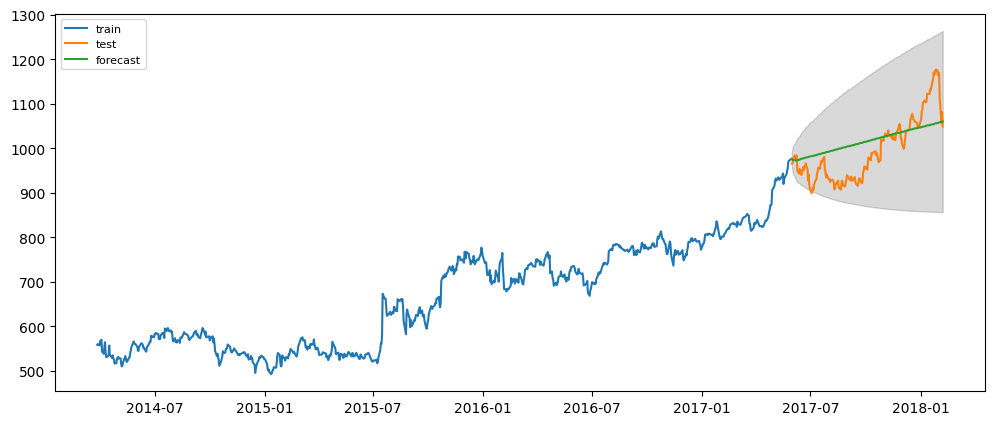

In [ ]:
import tensorflow as tf
from tensorflow import keras

print("mean_squared_error: ", keras.metrics.mean_squared_error(test, predictions[0]).numpy())
print("mean_absolute_error: ", keras.metrics.mean_absolute_error(test, predictions[0]).numpy())



mean_squared_error:  3071.434591407895
mean_absolute_error:  44.994611625447654


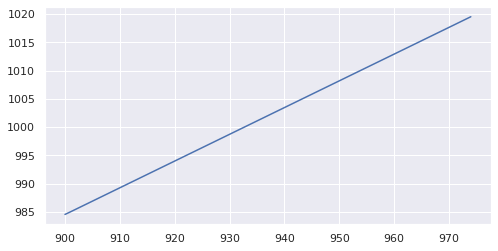

In [122]:
plt.plot(forecast[0])

In [123]:
forecast_df=pd.DataFrame(forecast[0], index=test.index, columns=['Prediction'])

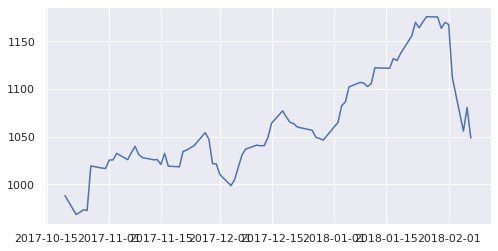

In [124]:
plt.plot(test)
plt.plot(forecast_df)

In [ ]:
upper=pd.DataFrame(forecast[1][:,1], index=test.index)
upper[0]

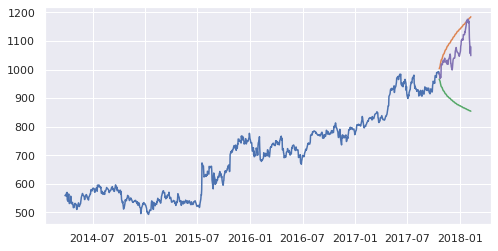

In [126]:
lower=pd.DataFrame(forecast[1][:,0], index=test.index)
upper=pd.Series(forecast[1][:,1], index=test.index)
plt.plot(train)
plt.plot(upper)
plt.plot(lower)
#plt.fill_between(lower, upper, alpha=0.2)
plt.plot(forecast_df)
plt.plot(test)

In [ ]:
lower=pd.DataFrame(forecast[1][:,0], index=test.index, parse_dates=True)


In [ ]:
stepwise_fit=auto_arima(dataset_Google['close'], Trace=True, suppress_warnings=True)
stepwise_fit.summary()

Correlation between different stocks' closing prices

In [ ]:
AAL0=pd.read_csv("/content/file_destination/individual_stocks_5yr/individual_stocks_5yr/AAL_data.csv", index_col=0, parse_dates=True)
FOX0=pd.read_csv("/content/file_destination/individual_stocks_5yr/individual_stocks_5yr/FOX_data.csv", index_col=0, parse_dates=True)
APPL0=pd.read_csv("/content/file_destination/individual_stocks_5yr/individual_stocks_5yr/AAPL_data.csv", index_col=0, parse_dates=True)
GOOG0=pd.read_csv("/content/file_destination/individual_stocks_5yr/individual_stocks_5yr/GOOG_data.csv", index_col=0, parse_dates=True)

FOX0.tail()


In [ ]:

AAL = AAL0.rename({'close': 'AAL close'}, axis=1)
FOX = FOX0.rename({'close': 'FOX close'}, axis=1)
APPL = APPL0.rename({'close': 'APPL close'}, axis=1)
GOOG = GOOG0.rename({'close': 'GOOG close'}, axis=1)

In [ ]:
Close=pd.concat([AAL['AAL close'], FOX['FOX close'], APPL['APPL close'], GOOG['GOOG close']], axis=1, keys=['AAL close', 'FOX close', 'APPL close', 'GOOG close'])

In [ ]:
Close.head()

In [ ]:
# I am sure there is an easier way to harmonize the 4 coloumns getting rid of the "NaN" entries
Close.isna().sum()

In [ ]:
Close_conversiontolist_FOX=Close['FOX close'].to_numpy('str').tolist()
Close_conversiontolist_GOOG=Close['GOOG close'].to_numpy('str').tolist()

FOX=[]
GOOG=[]
for i in Close_conversiontolist_FOX:
  if i=='nan':
    FOX.append(0)
  else:
    FOX.append(1)

for i in Close_conversiontolist_GOOG:
  if i=='nan':
    GOOG.append(0)
  else:
    GOOG.append(1)

plt.plot(FOX, label="FOX")
plt.plot(GOOG, label='GOOG')
plt.legend(loc="lower right")

In [ ]:
for i in range(1, len(GOOG)):
  if GOOG[i]==1 and GOOG[i-1]==0:
    print(i)

In [ ]:
Close_df=Close.iloc[284:]
Close_df.head()

In [ ]:
import seaborn as sns
print("Correlation between APPL and GOOG: ", Close_df['APPL close'].corr(Close_df['GOOG close']))

In [ ]:
sns.jointplot(Close_df['APPL close'], Close_df['GOOG close'], kind='scatter', color='lightblue')

In [ ]:
print("Correlation between FOX and GOOG: ", Close_df['FOX close'].corr(Close_df['GOOG close']))

In [ ]:
sns.jointplot(Close_df['FOX close'], Close_df['GOOG close'], kind='scatter', color='lightblue')

In [ ]:
sns.pairplot(Close_df, kind='reg')

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8)) 

sns.heatmap(Close_df.corr(), annot=True, cmap='summer', ax=ax)

Forecast with statsmodels api (SARIMA)

In [28]:


import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model=sm.tsa.statespace.SARIMAX(data, order=(3,0,0), seasonal_order=(2,1,0,5))
sarima_model_fit=sarima_model.fit()
forecast=sarima_model_fit.predict(n_periods=20, return_conf_int=True)



In [ ]:
index_of_fc = pd.date_range(data.index[-1], periods = n_periods)
index_of_fc

In [ ]:

n_periods = 20

index_of_fc = pd.date_range(data.index[-1], periods = n_periods)

# make series for plotting purpose
fitted_series = pd.Series(forecast[0], index=index_of_fc)
lower_series = pd.Series(forecast[1][:, 0], index=index_of_fc)
upper_series = pd.Series(forecast[1][:, 1], index=index_of_fc)



#lower_conversiontolist=lower.to_numpy('str').tolist()
#upper_conversiontolist=upper.to_numpy('str').tolist()

#a=[float(i) for x in lower_conversiontolist for i in x]
#b=[float(i) for x in upper_conversiontolist for i in x]

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='train')
plt.plot(test, label='test')
plt.plot(fitted_series, label='forecast')
plt.fill_between(lower_series.index, y1=lower_series, y2=upper_series, 
                 color='k', alpha=.15)
plt.legend(loc='upper left', fontsize=8)
plt.grid()


In [ ]:
future_df=pd.concat([data, fitted_series])
future_df.tail()

In [ ]:


split_time=700
time_train=time[:700]
x_train=close[:700]
time_valid=time[700:]
x_valid=np.array(close[700:])


window_size=50
batch_size=16
shuffle_buffer_size = 700

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset


dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)



In [ ]:
a=[x for x in dataset]
a[0]

In [ ]:
#################1.) One layer
x = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([x])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9))
history=model.fit(dataset,epochs=100,verbose=0)

In [ ]:
history.history


In [ ]:
forecast = []

for time in range(len(x_valid) - window_size):
  forecast.append(model.predict(x_valid[time:time + window_size][np.newaxis]))


results = np.array(forecast)[:, 0, 0]

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid[window_size:], results).numpy()


In [ ]:
plt.figure(figsize=(10,6))
plt.title('Google close data prediction with One layer NN', fontsize=20, color='purple')
plt.plot(time_valid[window_size:], x_valid[window_size:], label="valid dataset")
plt.plot(time_valid[window_size:], results, label="predicted dataset")
plt.legend(loc="upper left")